# Show Composites between High and Low Melt

In [1]:
#Import the relevant functions
#from functions.other_functions import computeBuoyancy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from functions.loading_and_processing_data import loadMITgcmData, \
loadPACEData, detrend_and_average_MITgcmData, loadTimeSeriesData

import sys
sys.path.append('/data/hpcdata/users/grejan/mitgcm/') #Make sure we can also import Kaitlins code.
from mitgcm_python_master.grid import ERA5Grid, PACEGrid, Grid, dA_from_latlon, pierre_obs_grid
from mitgcm_python_master.plot_utils.labels import latlon_axes
#Create Grid
gp='/data/oceans_output/shelf/kaight/mitgcm/PAS_grid/'
grid = Grid(gp)

/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:330: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hasattr(self, 'mode') and self.mode is 'w':
/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:705: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if typecode is not 'c':


### Load data

In [2]:
%%capture
#Load time series data
#total=loadTimeSeriesData(filename='timeseries_final', members='all', kind='old')
melt=loadTimeSeriesData(filename='timeseries_final', members='all', kind='old')['dotson_to_cosgrove_massloss']
meltrm=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt', window=60)

In [3]:
%%capture
#Load bottom flow (dataU2)
dataU_bottom=loadMITgcmData(filename='bottom100m_averaged_UVEL', members='all', kind='old')
dataV_bottom=loadMITgcmData(filename='bottom100m_averaged_VVEL', members='all', kind='old')

#Select relevant years
dataU_bottom=dataU_bottom.sel(time=slice('1920', '2013'))
dataV_bottom=dataV_bottom.sel(time=slice('1920', '2013'))


In [4]:
%%capture
#Load depth averaged data (barotropic) (dataU1)
dataU_trop=loadMITgcmData(filename='depth_averaged_UVEL', members='all', kind='old')
dataV_trop=loadMITgcmData(filename='depth_averaged_VVEL', members='all', kind='old')

#Select relevant years
dataU_trop=dataU_trop.sel(time=slice('1920', '2013'))
dataV_trop=dataV_trop.sel(time=slice('1920', '2013'))

#Compute baroclinic flow
dataU_clin=dataU_bottom-dataU_trop
dataV_clin=dataV_bottom-dataV_trop

In [5]:
#Interpolate to center of the cel (so that both x and y are corresponding to each other!)
def interpCenter(umean, vmean):
    #Read something with the correct locations (interpolation).
    data=loadMITgcmData(filename='EXFuwind', members=[1], kind='maps')
    #...Making sure interpolate everything to the center of the cells
    umean=umean.rename({'XG':'XC'})
    vmean=vmean.rename({'YG':'YC'})
    #Interpolate it to the correct location
    umean=umean.interp(XC=data.XC, YC=data.YC)
    vmean=vmean.interp(XC=data.XC, YC=data.YC)
    
    return umean, vmean
    

In [6]:
#Compute mean for High Melt
umean_bottom_HM=dataU_bottom.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
vmean_bottom_HM=dataV_bottom.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])

#Interpolate
umean_bottom_HM, vmean_bottom_HM = interpCenter(umean_bottom_HM, vmean_bottom_HM)

Loading number:0
../02_data/maps/EXFuwind_ens1.nc


/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing metho

In [7]:
#Compute mean for Low Melt
umean_bottom_LM=dataU_bottom.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])
vmean_bottom_LM=dataV_bottom.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

#Interpolate
umean_bottom_LM, vmean_bottom_LM = interpCenter(umean_bottom_LM, vmean_bottom_LM)

Loading number:0
../02_data/maps/EXFuwind_ens1.nc


/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing metho

In [8]:
#Barotropic:
#Compute mean for High Melt
umean_trop_HM=dataU_trop.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
vmean_trop_HM=dataV_trop.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])

#Interpolate
umean_trop_HM, vmean_trop_HM = interpCenter(umean_trop_HM, vmean_trop_HM)

#Compute mean for Low Melt
umean_trop_LM=dataU_trop.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])
vmean_trop_LM=dataV_trop.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

#Interpolate
umean_trop_LM, vmean_trop_LM = interpCenter(umean_trop_LM, vmean_trop_LM)

#Baroclinic:
#Compute mean for High Melt
umean_clin_HM=dataU_clin.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
vmean_clin_HM=dataV_clin.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])

#Interpolate
umean_clin_HM, vmean_clin_HM = interpCenter(umean_clin_HM, vmean_clin_HM)

#Compute mean for Low Melt
umean_clin_LM=dataU_clin.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])
vmean_clin_LM=dataV_clin.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

#Interpolate
umean_clin_LM, vmean_clin_LM = interpCenter(umean_clin_LM, vmean_clin_LM)


Loading number:0
../02_data/maps/EXFuwind_ens1.nc


/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing metho

Loading number:0
../02_data/maps/EXFuwind_ens1.nc


/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing metho

Loading number:0
../02_data/maps/EXFuwind_ens1.nc


/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing metho

Loading number:0
../02_data/maps/EXFuwind_ens1.nc


/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/users/grejan/conda-envs/amundsen/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing metho

### Visualization

In [9]:
def plotVelocityArrows(ax, umean, vmean, umean_other, vmean_other,
                       scale=3, step1=4, step2=5,
                       grid=grid, norm_limit=0.01, ylim=-70, show_key=True, show_diff=False):
    '''
    Create quiver plots of velocity means.
    INPUT
    ax (matplotlib axis): axis to plot on
    umean (xr.Dataset): dataset containing the zonal velocities (note: UVEL must be a variable)
    vmean (xr.Dataset): dataset containing the meridional velocities (note: VVEL must be a variable)
    umean_other (xr.Dataset): zonal velocities to compare with (if difference in norm is small, not taken into account)
    (note: UVEL must be a variable)
    vmean_other (xr.Dataset): meridiona velocities to compare with (if difference in norm is small, not taken into account)
    (note: VVEL must be a variable)
    
    scale (int): scale of arrow length
    step1 (int): the arrow of 1 in x points in the horizontal is shown
    step2 (int): the arrow of 1 in x points in the vertical is shown
    
    grid: grid (see Kaitlins code)
    norm_limit: if difference in norm between velocities and other velocities is smaller than this limit, removed.
    ylim (float): northern y limit [deg]
    show_key (boolean): show to length what the size of the arrow corresponds
    show_diff (boolean): do we want to show the umean and vmean or the 
                        difference between umean and umean_other 
                        /  vmean and vmean_other
    
    
    Return:
    ax (matplotlib axis): the quiver plot
    
    '''
    
    #Limit number of arrows
    
    #Only show arrows that are important and the show a specific difference
    norm_HM=np.sqrt(umean['UVEL']**2+vmean['VVEL']**2)
    norm_LM=np.sqrt(umean_other['UVEL']**2+vmean_other['VVEL']**2)
    
    if show_diff==True:
        umean_plot=(umean['UVEL']-umean_other['UVEL']).where(abs((norm_HM-norm_LM))>norm_limit).to_numpy()[::step1, ::step2]
        vmean_plot=(vmean['VVEL']-vmean_other['VVEL']).where(abs((norm_HM-norm_LM))>norm_limit).to_numpy()[::step1, ::step2]
    else:
        umean_plot=umean['UVEL'].where(abs((norm_HM-norm_LM))>norm_limit).to_numpy()[::step1, ::step2]
        vmean_plot=vmean['VVEL'].where(abs((norm_HM-norm_LM))>norm_limit).to_numpy()[::step1, ::step2]
    
    #Plot coastline and bathymetry contours
    plt.pcolor(grid.lon_2d[grid.lat_1d<ylim,:], grid.lat_2d[grid.lat_1d<ylim,:], 
               grid.land_mask[grid.lat_1d<ylim,:], cmap='Greys', vmax=1.5)
    plt.contour(grid.lon_2d[grid.lat_1d<ylim,:], 
                grid.lat_2d[grid.lat_1d<ylim,:], grid.bathy[grid.lat_1d<-70,:], levels=[-1000, -500], 
                linestyles='dashed', linewidths=[1], colors=['k', 'green'])
    #Plot arrows
    Q=plt.quiver(vmean.XC[::step2]-360, umean.YC[::step1], umean_plot, vmean_plot, vmean_plot, 
                 scale=scale, cmap='seismic', zorder=5, edgecolor='k', linewidth = 0.5)
    if show_key==True:
        qk = ax.quiverkey(Q, 0.85, 0.85, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.ylim([-75.5, ylim])
    return ax

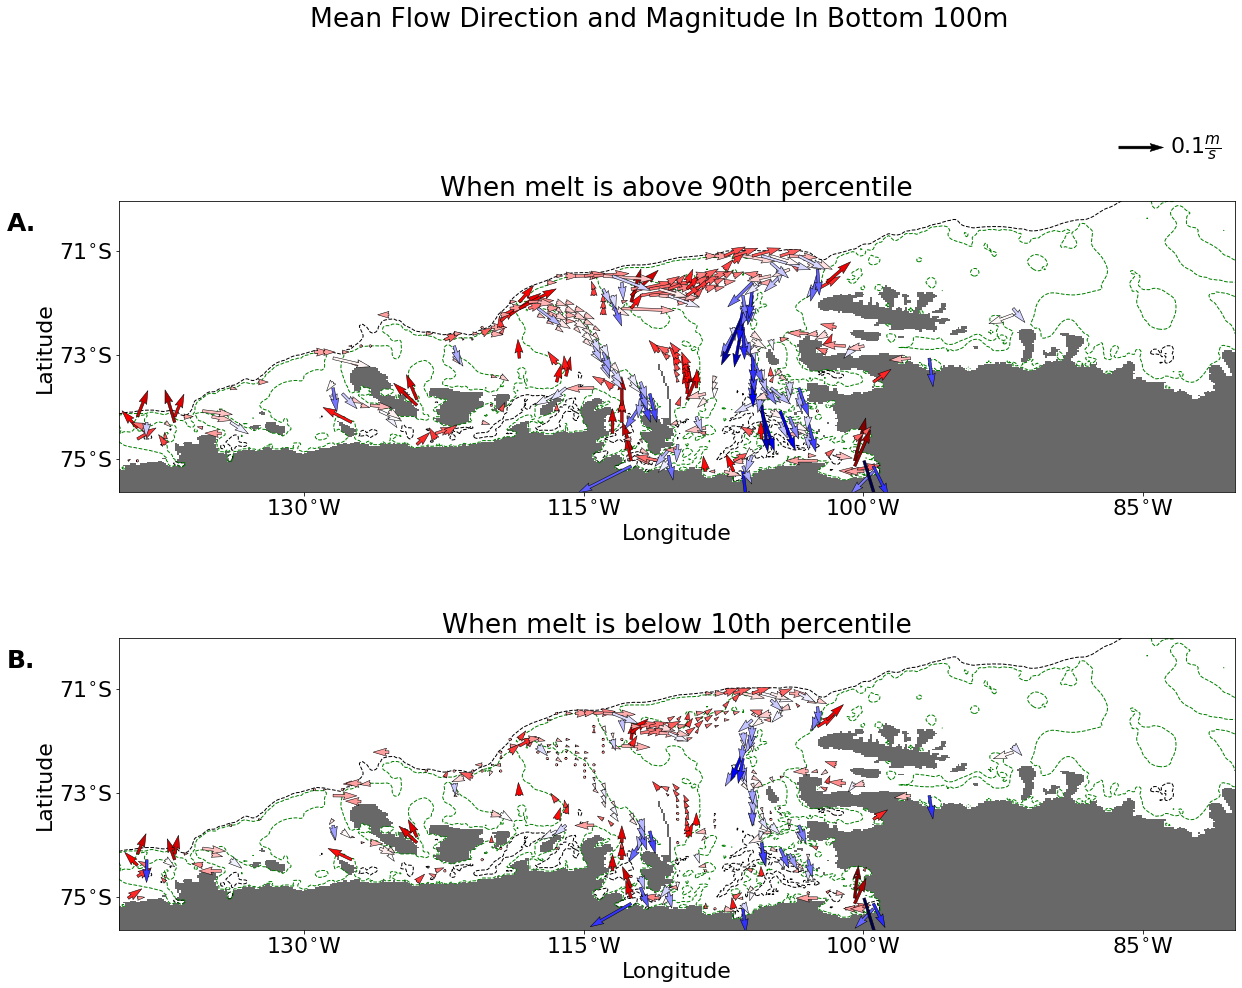

In [10]:
#Difference between bottom flow for high and low melt

#Make sure that we do not show all arrows
scale=2.5
step1=4
step2=5

#Upper ylimit of the plots
ylim=-70

#Set fontsize
plt.rcParams.update({'font.size': 22})

fig=plt.figure(figsize=(20,15))
plt.suptitle('Mean Flow Direction and Magnitude In Bottom 100m')

ax=plt.subplot(2,1,1)
ax=plotVelocityArrows(ax=ax, umean=umean_bottom_HM, vmean=vmean_bottom_HM, 
                      umean_other=umean_bottom_LM, vmean_other=vmean_bottom_LM,
                      scale=scale, step1=step1, step2=step2,
                      grid=grid, norm_limit=0.01, ylim=ylim, show_key=True, show_diff=False)
plt.title('When melt is above 90th percentile')

ax=plt.subplot(2,1,2)
ax=plotVelocityArrows(ax=ax, umean=umean_bottom_LM, vmean=vmean_bottom_LM, 
                      umean_other=umean_bottom_HM, vmean_other=vmean_bottom_HM,
                      scale=scale, step1=step1, step2=step2,
                      grid=grid, norm_limit=0.01, ylim=ylim, show_key=False, show_diff=False)
plt.title('When melt is below 10th percentile')

fig.subplots_adjust(hspace=0.5, wspace=0.5, top=0.8)

import string
for n, ax in enumerate(fig.axes):
    ax.set_xticks([-130, -115, -100, -85])
    ax.set_yticks([-75, -73, -71])
    ax.text(-0.1, 0.9, string.ascii_uppercase[n]+'.', transform=ax.transAxes, 
            size=25, weight='bold')
    latlon_axes(ax=ax, x=grid.lon_2d[grid.lat_1d<ylim,:], y=grid.lat_2d[grid.lat_1d<ylim,:])
        
from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")
plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_bottom100m_1-20.png')


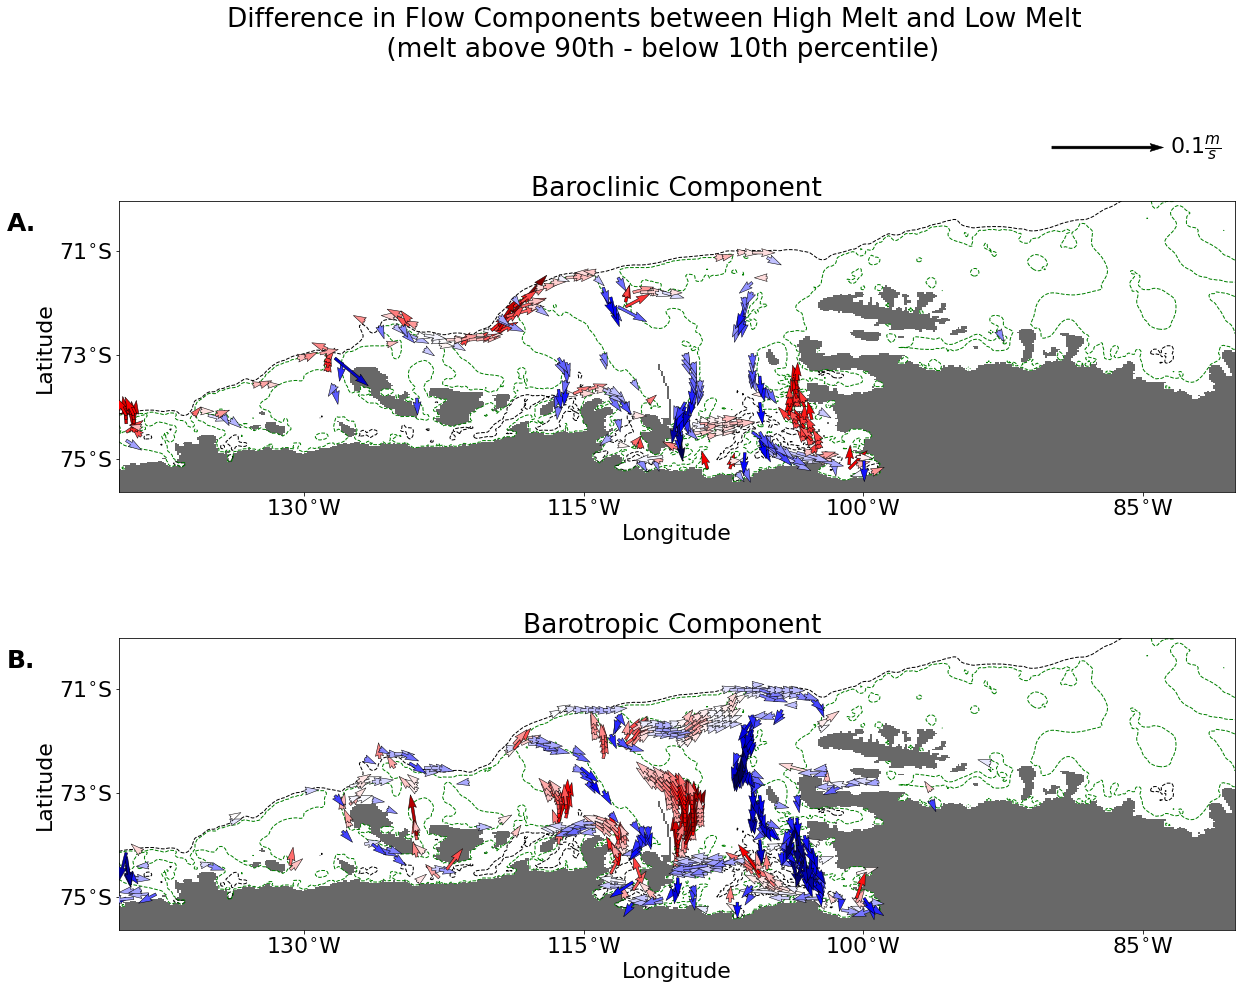

In [11]:
#Difference between high and low melt for baroclinic flow and barotropic flow

scale=1
step1=3
step2=4

fig=plt.figure(figsize=(20,15))
ax=plt.subplot(2,1,1)
ax=plotVelocityArrows(ax=ax, umean=umean_clin_HM, vmean=vmean_clin_HM, 
                      umean_other=umean_clin_LM, vmean_other=vmean_clin_LM,
                      scale=scale, step1=step1, step2=step2,
                      grid=grid, norm_limit=0.01, ylim=ylim, show_key=True, show_diff=True)
plt.title('Baroclinic Component')


ax=plt.subplot(2,1,2)
ax=plotVelocityArrows(ax=ax, umean=umean_trop_HM, vmean=vmean_trop_HM, 
                      umean_other=umean_trop_LM, vmean_other=vmean_trop_LM,
                      scale=scale, step1=step1, step2=step2,
                      grid=grid, norm_limit=0.01, ylim=ylim, show_key=False, show_diff=True)
plt.title('Barotropic Component ')


plt.suptitle('Difference in Flow Components between High Melt and Low Melt \n (melt above 90th - below 10th percentile)')
plt.subplots_adjust(top=0.8, hspace=0.5)


import string
for n, ax in enumerate(fig.axes):
    ax.set_xticks([-130, -115, -100, -85])
    ax.set_yticks([-75, -73, -71])
    ax.text(-0.1, 0.9, string.ascii_uppercase[n]+'.', transform=ax.transAxes, 
            size=25, weight='bold')
    latlon_axes(ax=ax, x=grid.lon_2d[grid.lat_1d<ylim,:], y=grid.lat_2d[grid.lat_1d<ylim,:])

plt.savefig('../03_output/composite/'+today+'_difference_90-10_baroclinic_barotropic_1-20.png')



## BONUS

In [19]:
umean=dataU.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
vmean=dataV.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])

In [20]:
umean2=dataU.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])
vmean2=dataV.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

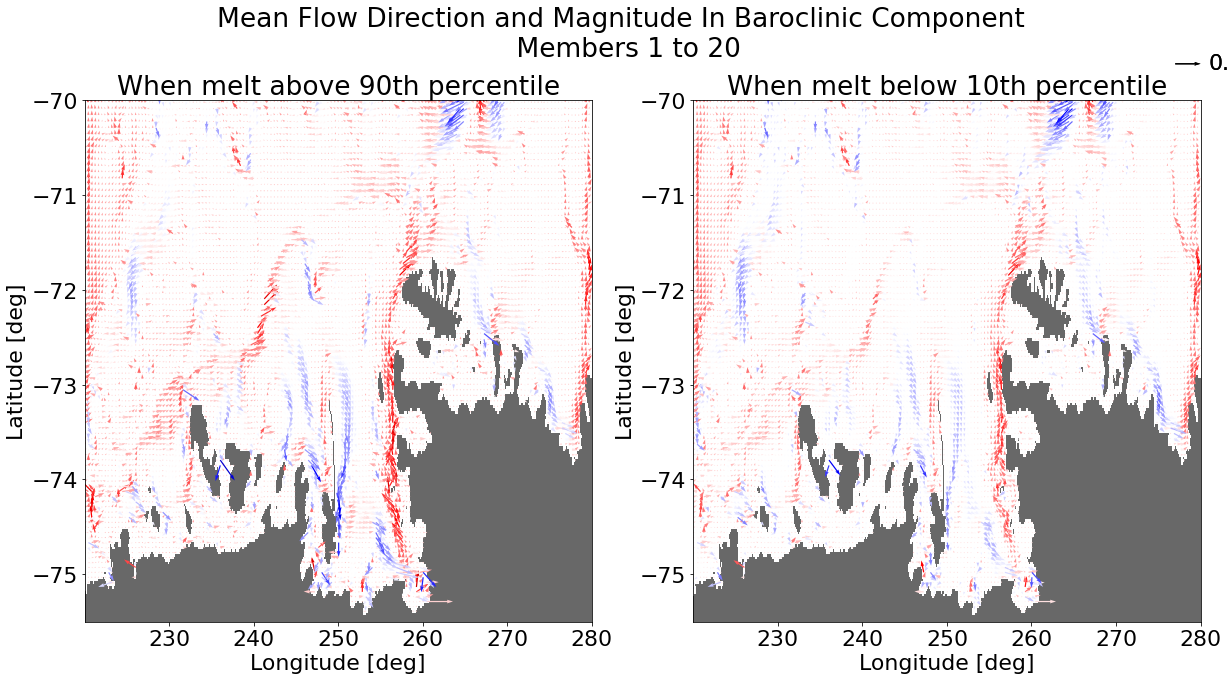

In [8]:
step1=2
step2=4
scale=2

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Flow Direction and Magnitude In Baroclinic Component \n Members 1 to 20')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmean.XC[::step2], umean.YC[::step1], umean['UVEL'].values[::step1, ::step2], vmean['VVEL'].values[::step1, ::step2], vmean['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmean2.XC[::step2], umean2.YC[::step1], umean2['UVEL'].values[::step1, ::step2], vmean2['VVEL'].values[::step1, ::step2], vmean2['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-20.png')

# plt.subplot(2,2,2)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

# plt.subplot(2,2,3)
# plt.quiver(umean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], scale=scale, cmap='seismic')
# plt.subplot(2,2,4)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

(-75.5, -70.0)

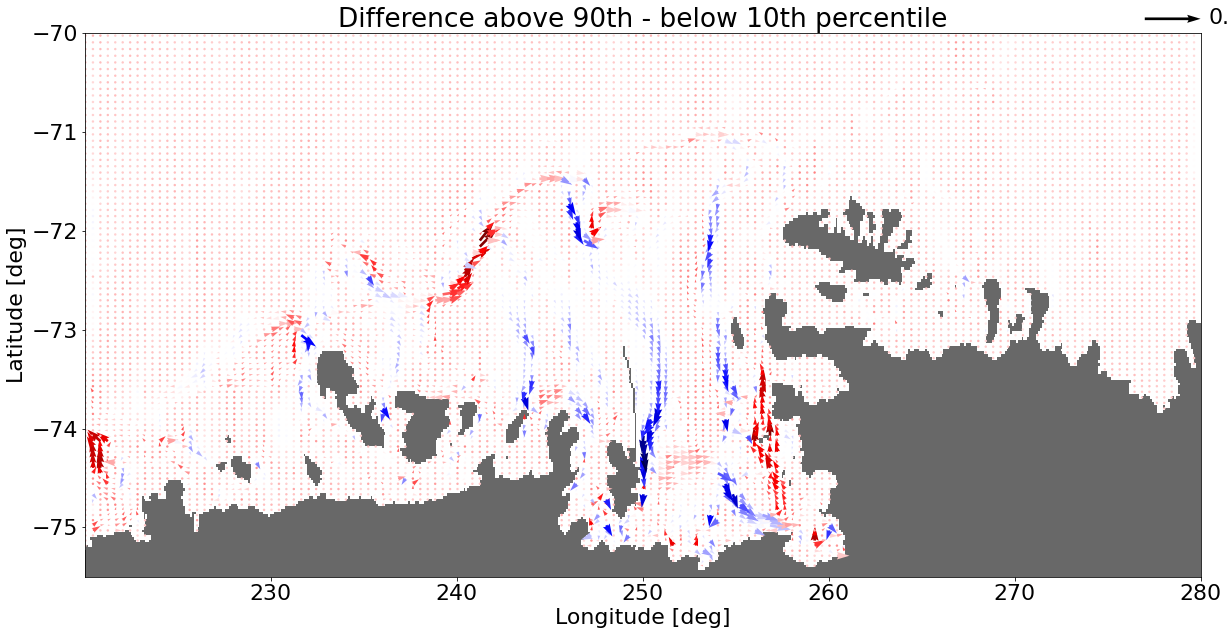

In [11]:
plt.figure(figsize=(20,10))
ax=plt.subplot(1,1,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmean2.XC[::step2], umean2.YC[::step1], umean['UVEL'].values[::step1, ::step2]-umean2['UVEL'].values[::step1, ::step2], 
             vmean['VVEL'].values[::step1, ::step2]-vmean2['VVEL'].values[::step1, ::step2], vmean['VVEL'].values[::step1, ::step2]-vmean2['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('Baroclinic Component: Difference above 90th - below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

In [21]:
umean1=dataU1.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
vmean1=dataV1.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])

In [22]:
umean21=dataU1.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])
vmean21=dataV1.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

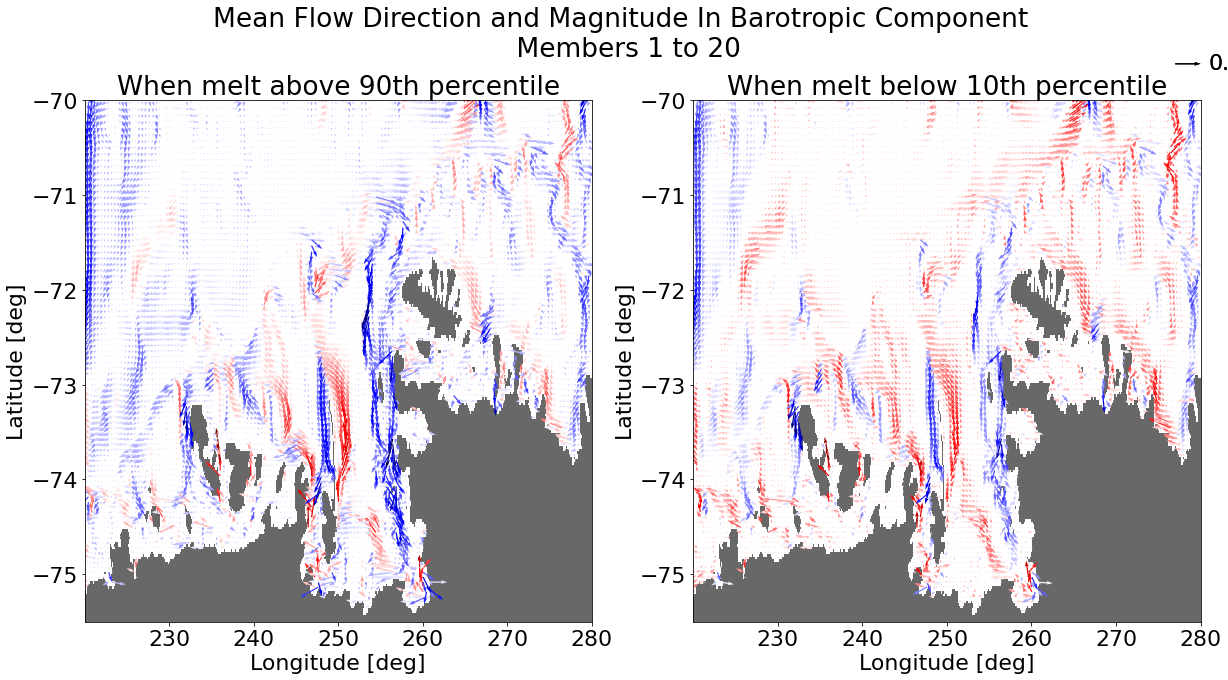

In [14]:
step1=2
step2=4
scale=2

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Flow Direction and Magnitude In Barotropic Component \n Members 1 to 20')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmean.XC[::step2], umean.YC[::step1], umean1['UVEL'].values[::step1, ::step2], 
             vmean1['VVEL'].values[::step1, ::step2], vmean1['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmean21.XC[::step2], umean21.YC[::step1], umean21['UVEL'].values[::step1, ::step2], 
             vmean21['VVEL'].values[::step1, ::step2], vmean21['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_barotropic_1-20.png')

# plt.subplot(2,2,2)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

# plt.subplot(2,2,3)
# plt.quiver(umean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], scale=scale, cmap='seismic')
# plt.subplot(2,2,4)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

(-75.5, -70.0)

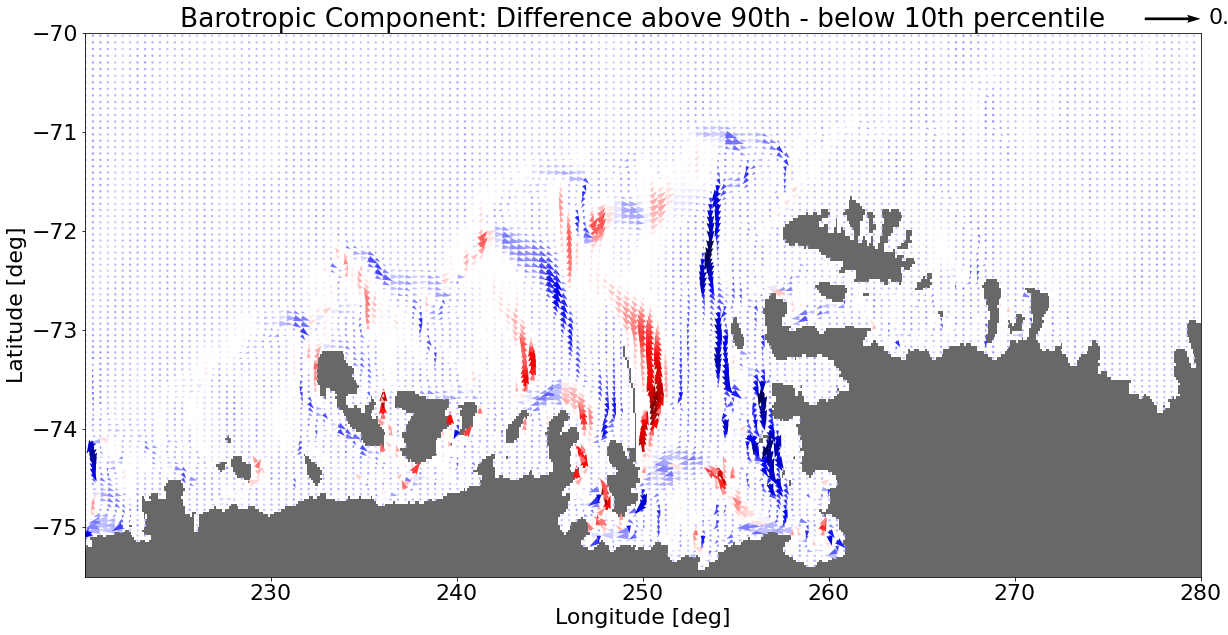

In [15]:
plt.figure(figsize=(20,10))
ax=plt.subplot(1,1,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmean21.XC[::step2], umean21.YC[::step1], umean1['UVEL'].values[::step1, ::step2]-umean21['UVEL'].values[::step1, ::step2], 
             vmean1['VVEL'].values[::step1, ::step2]-vmean21['VVEL'].values[::step1, ::step2], vmean1['VVEL'].values[::step1, ::step2]-vmean21['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('Barotropic Component: Difference above 90th - below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

In [43]:
umeandiff=umean['UVEL'].values[::step1, ::step2]-umean2['UVEL'].values[::step1, ::step2]
vmeandiff=vmean['VVEL'].values[::step1, ::step2]-vmean2['VVEL'].values[::step1, ::step2]
norm=np.sqrt(umeandiff**2+vmeandiff**2)

In [46]:
umeandiff[norm<0.01]=np.nan
vmeandiff[norm<0.01]=np.nan

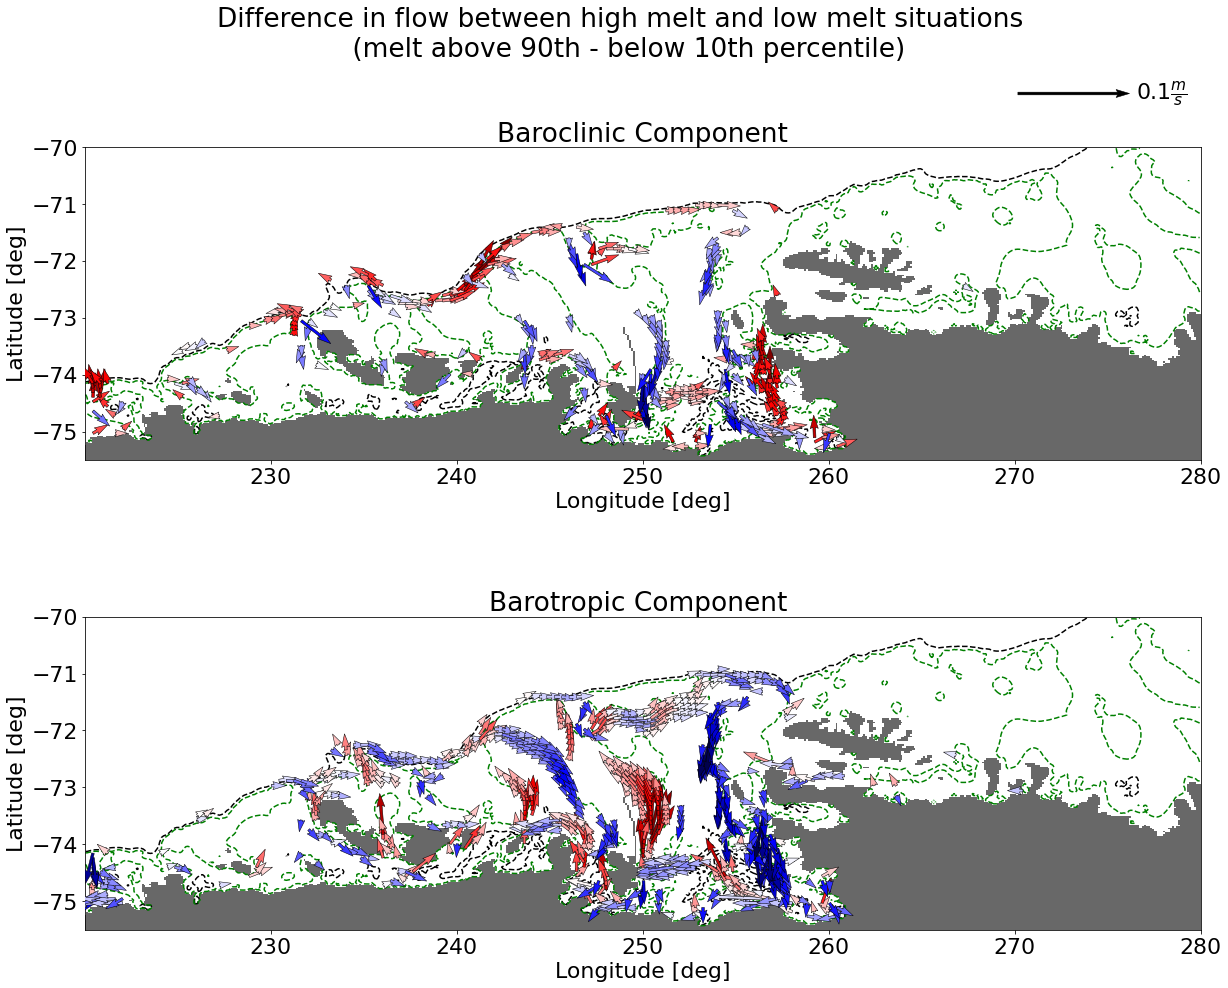

In [57]:
scale=1
step1=3
step2=4

plt.figure(figsize=(20,15))
ax=plt.subplot(2,1,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
plt.contour(360+grid.lon_2d[grid.lat_1d<-70,:], 
            grid.lat_2d[grid.lat_1d<-70,:], grid.bathy[grid.lat_1d<-70,:], levels=[-1000, -500], 
            linestyles='dashed', colors=['k', 'green'])

umeandiff=umean['UVEL'].values[::step1, ::step2]-umean2['UVEL'].values[::step1, ::step2]
vmeandiff=vmean['VVEL'].values[::step1, ::step2]-vmean2['VVEL'].values[::step1, ::step2]
norm=np.sqrt(umeandiff**2+vmeandiff**2)
umeandiff[norm<0.01]=np.nan
vmeandiff[norm<0.01]=np.nan

Q=plt.quiver(vmean2.XC[::step2], umean2.YC[::step1], umeandiff, vmeandiff, vmeandiff, 
             scale=scale, cmap='seismic', zorder=5, edgecolor='k', linewidth = 0.5)
qk = ax.quiverkey(Q, 0.85, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('Baroclinic Component')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

umeandiff=umean1['UVEL'].values[::step1, ::step2]-umean21['UVEL'].values[::step1, ::step2]
vmeandiff=vmean1['VVEL'].values[::step1, ::step2]-vmean21['VVEL'].values[::step1, ::step2]
norm=np.sqrt(umeandiff**2+vmeandiff**2)
umeandiff[norm<0.01]=np.nan
vmeandiff[norm<0.01]=np.nan

ax=plt.subplot(2,1,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], 
           grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
plt.contour(360+grid.lon_2d[grid.lat_1d<-70,:], 
            grid.lat_2d[grid.lat_1d<-70,:], grid.bathy[grid.lat_1d<-70,:], levels=[-1000, -500], 
            linestyles='dashed', colors=['k', 'green'])
Q=plt.quiver(vmean2.XC[::step2], umean2.YC[::step1], umeandiff, vmeandiff, vmeandiff, 
             scale=scale, cmap='seismic', zorder=5, edgecolor='k', linewidth = 0.5)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('Barotropic Component ')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

plt.suptitle('Difference in flow between high melt and low melt situations \n (melt above 90th - below 10th percentile)')
plt.subplots_adjust(top=0.85, hspace=0.5)
plt.savefig('../03_output/composite/'+today+'_difference_90-10_baroclinic_barotropic_1-20.png')



In [ ]:
umeandiff=umean_bottom_HM['UVEL'].values[::step1, ::step2]-umean_bottom_LM['UVEL'].values[::step1, ::step2]
vmeandiff=vmean_bottom_HM['VVEL'].values[::step1, ::step2]-vmean_bottom_LM['VVEL'].values[::step1, ::step2]
norm=np.sqrt(umeandiff**2+vmeandiff**2)
umeandiff[norm<0.01]=np.nan
vmeandiff[norm<0.01]=np.nan

ax=plt.subplot(3,1,3)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], 
           grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
plt.contour(360+grid.lon_2d[grid.lat_1d<-70,:], 
            grid.lat_2d[grid.lat_1d<-70,:], grid.bathy[grid.lat_1d<-70,:], levels=[-1000, -500], 
            linestyles='dashed', colors=['k', 'green'])
Q=plt.quiver(vmean2.XC[::step2], umean2.YC[::step1], umeandiff, vmeandiff, vmeandiff, 
             scale=scale, cmap='seismic', zorder=5, edgecolor='k', linewidth = 0.5)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('Full Flow Bottom 100m')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

In [58]:
%%capture
isotherm=loadTimeSeriesData(filename='timeseries_isotherm', members='all', kind='old')
#isotherm['time']=isotherm.indexes['time'].to_datetimeindex()
#isotherm['ens']=isotherm['ens']+1
isotherm=isotherm.sel(time=slice('1920','2013'))
convection=(isotherm['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(time=24, center=True).mean()<-440) &\
(isotherm['pine_island_bay_isotherm_0C_below_100m'].rolling(time=24, center=True).mean()<-470) & \
(isotherm['dotson_bay_isotherm_-1C_below_100m'].rolling(time=24, center=True).mean()<-430)

In [59]:
umeanC=dataU.where(convection==True).mean(dim=['time', 'ens'])
vmeanC=dataV.where(convection==True).mean(dim=['time', 'ens'])

In [60]:
umeanNC=dataU.where(convection==False).mean(dim=['time', 'ens'])
vmeanNC=dataV.where(convection==False).mean(dim=['time', 'ens'])

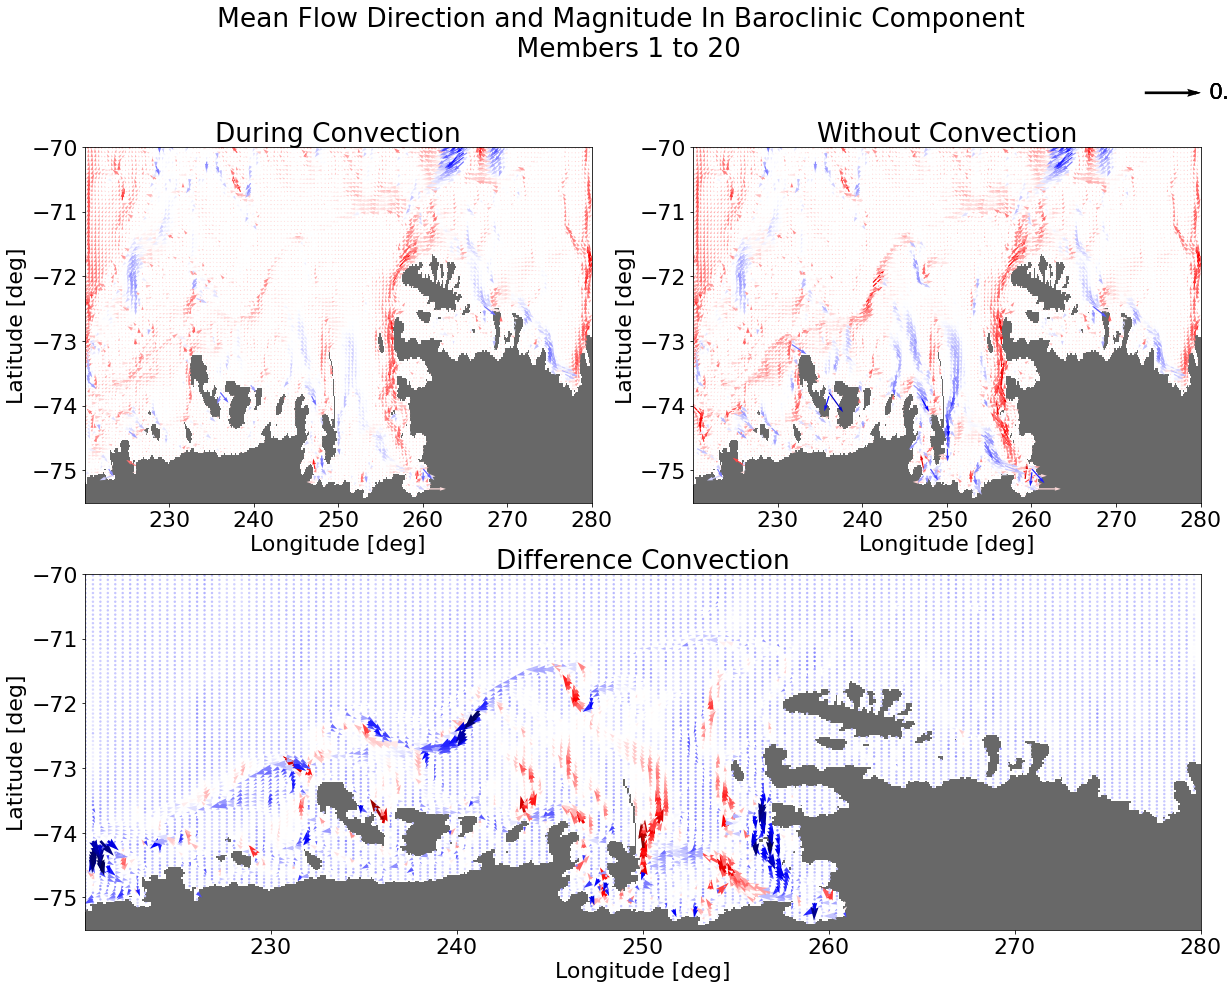

In [64]:
step1=2
step2=4
scale=2

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,15))
plt.suptitle('Mean Flow Direction and Magnitude In Baroclinic Component \n Members 1 to 20')
ax=plt.subplot(2,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmeanC.XC[::step2], umeanC.YC[::step1], umeanC['UVEL'].values[::step1, ::step2], 
             vmeanC['VVEL'].values[::step1, ::step2], vmeanC['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('During Convection')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(2,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmeanNC.XC[::step2], umeanNC.YC[::step1], umeanNC['UVEL'].values[::step1, ::step2], 
             vmeanNC['VVEL'].values[::step1, ::step2], vmeanNC['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('Without Convection')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(2,1,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmeanNC.XC[::step2], umeanNC.YC[::step1], umeanC['UVEL'].values[::step1, ::step2]-umeanNC['UVEL'].values[::step1, ::step2], 
             vmeanC['VVEL'].values[::step1, ::step2]-vmeanNC['VVEL'].values[::step1, ::step2], vmeanC['VVEL'].values[::step1, ::step2]-vmeanNC['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('Difference Convection')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_barotropic_1-20.png')

# plt.subplot(2,2,2)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

# plt.subplot(2,2,3)
# plt.quiver(umean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], scale=scale, cmap='seismic')
# plt.subplot(2,2,4)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

In [65]:
umeanC1=dataU1.where(convection==True).mean(dim=['time', 'ens'])
vmeanC1=dataV1.where(convection==True).mean(dim=['time', 'ens'])
umeanNC1=dataU1.where(convection==False).mean(dim=['time', 'ens'])
vmeanNC1=dataV1.where(convection==False).mean(dim=['time', 'ens'])

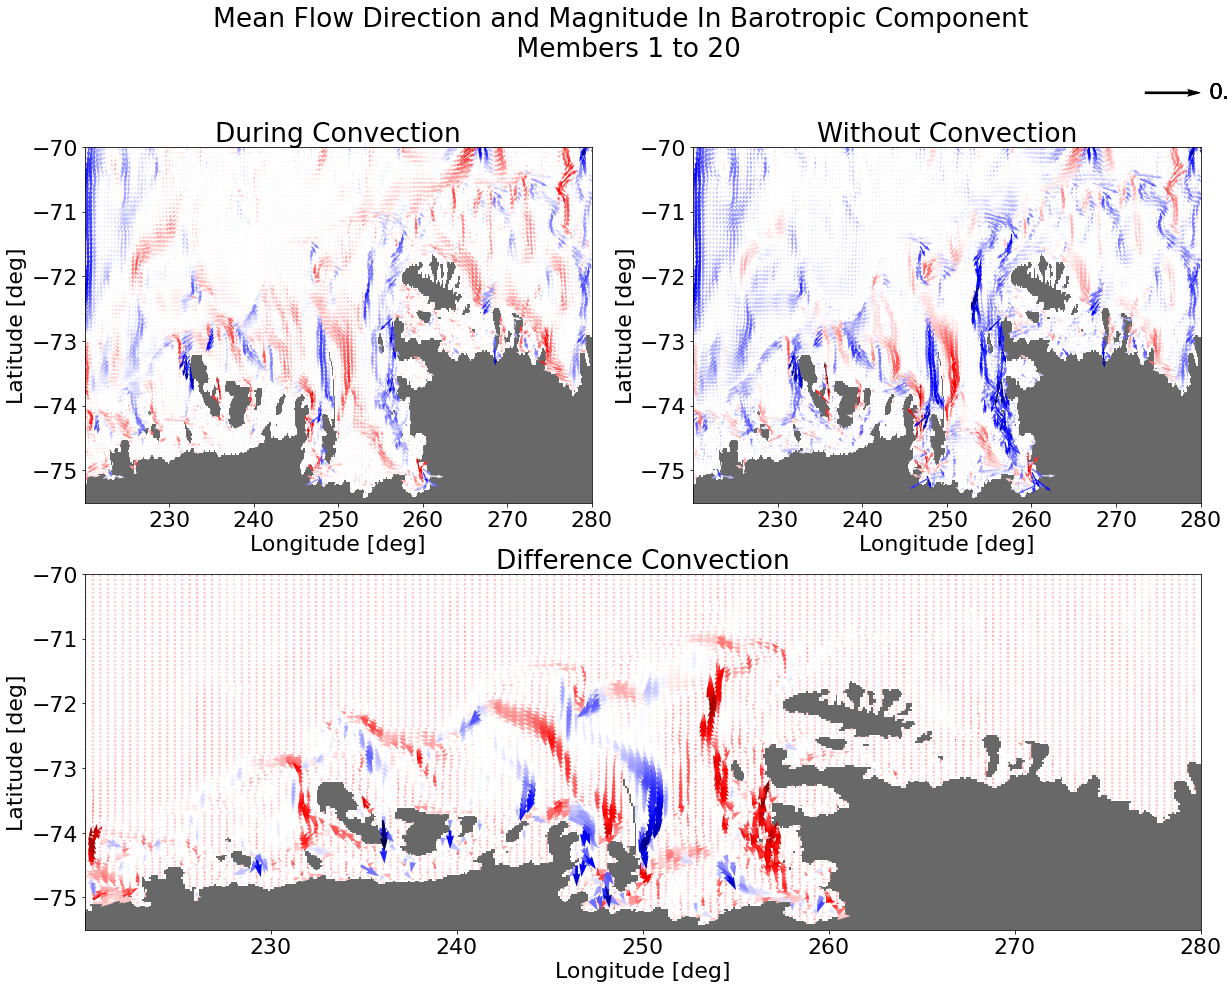

In [68]:
step1=2
step2=4
scale=2

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,15))
plt.suptitle('Mean Flow Direction and Magnitude In Barotropic Component \n Members 1 to 20')
ax=plt.subplot(2,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmeanC1.XC[::step2], umeanC1.YC[::step1], umeanC1['UVEL'].values[::step1, ::step2], 
             vmeanC1['VVEL'].values[::step1, ::step2], vmeanC1['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('During Convection')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(2,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmeanNC1.XC[::step2], umeanNC1.YC[::step1], umeanNC1['UVEL'].values[::step1, ::step2], 
             vmeanNC1['VVEL'].values[::step1, ::step2], vmeanNC1['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('Without Convection')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(2,1,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmeanNC1.XC[::step2], umeanNC1.YC[::step1], umeanC1['UVEL'].values[::step1, ::step2]-umeanNC1['UVEL'].values[::step1, ::step2], 
             vmeanC1['VVEL'].values[::step1, ::step2]-vmeanNC1['VVEL'].values[::step1, ::step2], 
             vmeanC1['VVEL'].values[::step1, ::step2]-vmeanNC1['VVEL'].values[::step1, ::step2], 
             scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('Difference Convection')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')


from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_barotropic_1-20.png')

# plt.subplot(2,2,2)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

# plt.subplot(2,2,3)
# plt.quiver(umean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], scale=scale, cmap='seismic')
# plt.subplot(2,2,4)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

In [2]:
def showCorMapAxis(ax, members='all',
                  data=None, datafn='depth_averaged_UVEL', datavar='UVEL', datakind='old',
                  ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 24),
                  detrend=True, deseasonalize=True, window=24, title='2D Correlation Map', ymax=-70, save=False, savefn='test',
                  draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
                  mask='land', years=['1920', '2013'],
                  inverse=False, save_results=True,
                  give_back=False, cumsum_map=False):
    
    '''
    Input: Always give U component as input!
    
    '''
    from mitgcm_python_master.grid import ERA5Grid, PACEGrid, Grid, dA_from_latlon, pierre_obs_grid
    from scipy import stats
    
    print('Start preparing for correlation map!')
    print('NOTE: this is version 3!')
    plt.rcParams.update({'font.size': 22})
    
    if members=='all':
        members=np.arange(1,21)
    
    for i, ens in enumerate(members):
        #print(ens)
        if deseasonalize==True:
            if cumsum_map==True:
                try:
                    #temp_opt_lag=np.load('../02_data/correlation/2D_opt_lag_cum'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.npy')
                    #temp_maxp=xr.open_dataarray('../02_data/correlation/2D_maxp_cum'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                    temp_maxcor=xr.open_dataarray('../02_data/correlation/2D_maxcor_cum'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                except:
                    #temp_opt_lag=np.load('../02_data/correlation/opt_lag_cum'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.npy')
                    #temp_maxp=xr.open_dataarray('../02_data/correlation/maxp_cum'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                    temp_maxcor=xr.open_dataarray('../02_data/correlation/maxcor_cum'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
            else:
                try:
                    #temp_opt_lag=np.load('../02_data/correlation/2D_opt_lag_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.npy')
                    #temp_maxp=xr.open_dataarray('../02_data/correlation/2D_maxp_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                    temp_maxcor=xr.open_dataarray('../02_data/correlation/2D_maxcor_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                except:
                    #temp_opt_lag=np.load('../02_data/correlation/opt_lag_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.npy')
                    #temp_maxp=xr.open_dataarray('../02_data/correlation/maxp_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                    temp_maxcor=xr.open_dataarray('../02_data/correlation/maxcor_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
        else:
            try:
                #temp_opt_lag=np.load('../02_data/correlation/2D_opt_lag_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_w'+str(window)+'_ens'+str(ens)+'.npy')
                #temp_maxp=xr.open_dataarray('../02_data/correlation/2D_maxp_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                temp_maxcor=xr.open_dataarray('../02_data/correlation/2D_maxcor_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
            except:
                try:
                    #temp_opt_lag=np.load('../02_data/correlation/opt_lag_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_w'+str(window)+'_ens'+str(ens)+'.npy')
                    #temp_maxp=xr.open_dataarray('../02_data/correlation/maxp_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                    temp_maxcor=xr.open_dataarray('../02_data/correlation/maxcor_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                except:
                    #temp_opt_lag=np.load('../02_data/correlation/2D_opt_lag_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.npy')
                    #temp_maxp=xr.open_dataarray('../02_data/correlation/2D_maxp_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                    temp_maxcor=xr.open_dataarray('../02_data/correlation/2D_maxcor_'+datafn+'_'+indvar+'_dt'+str(detrend)+'_dS'+str(deseasonalize)+'_w'+str(window)+'_ens'+str(ens)+'.nc')
                    
        if i==0:
           # opt_lag=temp_opt_lag
            #maxp=temp_maxp
            maxcor=temp_maxcor
        else:
            #opt_lag=np.dstack((opt_lag, temp_opt_lag))
            #maxp=xr.concat([maxp, temp_maxp], dim='ens')
            maxcor=xr.concat([maxcor, temp_maxcor], dim='ens')
    if i==0:
        #maxp=maxp.expand_dims('ens')
        maxcor=maxcor.expand_dims('ens')

    
    #stdp=maxp.mean(dim='ens')
    maxp=stats.ttest_1samp(maxcor, popmean=0)[1]
    #opt_lag_p_pos=stats.ttest_1samp(opt_lag, axis=2, popmean=0, alternative='greater')[1]
    #opt_lag_p_neg=stats.ttest_1samp(opt_lag, axis=2, popmean=0, alternative='less')[1]
    
    stdcor=maxcor.std(dim='ens')
    maxcor=maxcor.mean(dim='ens')
    #if members[-1]!=21:
        #std_lag=np.nanstd(opt_lag, axis=2)
        #opt_lag=np.nanmean(opt_lag, axis=2)
    #else:
        #std_lag=np.zeros(np.shape(opt_lag))
    
    #maxcor=maxcor.where(maxcor!=0, other=np.nan)
    maxcor=maxcor.where((maxp<0.05) | maxcor.isnull(), other=0)
    #opt_lag[(opt_lag_p_pos>0.05)&(opt_lag_p_neg>0.05)]=0
        
    #Reading Grid
    gp='/data/oceans_output/shelf/kaight/mitgcm/PAS_grid/'
    grid = Grid(gp)
    
    print('...Plotting')
    #fig, ax=plt.subplots(2,1, figsize=(20,14))
    
#     if members[-1]==21:
#         fig.suptitle(title+'\n Ensemble Mean; '+str(window)+' month rolling mean; p<0.05')
#     else:
#         fig.suptitle(title+'\n Mean over members '+ str(members[0]+1)+' to '+ str(members[-1])+'; '+str(window)+' month rolling mean; p<0.05')


    #PLOT CORRELATION COEFFICIENTS
    img=ax.pcolor(maxcor.XC, maxcor.YC, maxcor, cmap='seismic', vmin=-1, vmax=1)
    plt.colorbar(img, ax=ax, label='Max Pearson r')
    CS=ax.contour(maxcor.XC, maxcor.YC, maxcor, [-0.5, 0.5], colors='yellow')
    ax.clabel(CS, CS.levels, inline=True,fontsize=10)

    bath=ax.contour(grid.lon_2d+360, grid.lat_2d, grid.bathy, levels=[-1000], colors=['black'])
    plt.clabel(bath, [-1000])
    if type(ymax)!=type(None):
        ax.set_ylim([-75.5, ymax])
    if 'ice' in mask:
        ax.pcolor(grid.lon_2d+360, grid.lat_2d, np.where(grid.ice_mask, np.ones(np.shape(grid.ice_mask)), np.nan*np.ones(np.shape(grid.ice_mask))), cmap='cool')
    ax.set_facecolor('grey')
    ax.set_xlabel('Longitude [deg]')
    ax.set_ylabel('Latitude [deg]')
    ax.set_title(title)

    if draw_box==True:
        ax.plot([box_x[0], box_x[1], box_x[1], box_x[0], box_x[0]], [box_y[0], box_y[0], box_y[1], box_y[1], box_y[0]], 'o-k')
    
    return ax

Start preparing for correlation map!
NOTE: this is version 3!


/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':
/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:330: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hasattr(self, 'mode') and self.mode is 'w':
/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:705: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if typecode is not 'c':


...Plotting


/tmp/ipykernel_88110/268045402.py:106: UserWarning: No contour levels were found within the data range.
  CS=ax.contour(maxcor.XC, maxcor.YC, maxcor, [-0.5, 0.5], colors='yellow')
/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':


Start preparing for correlation map!
NOTE: this is version 3!
...Plotting
Start preparing for correlation map!
NOTE: this is version 3!


/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':


...Plotting


/tmp/ipykernel_88110/268045402.py:106: UserWarning: No contour levels were found within the data range.
  CS=ax.contour(maxcor.XC, maxcor.YC, maxcor, [-0.5, 0.5], colors='yellow')
/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':


Start preparing for correlation map!
NOTE: this is version 3!
...Plotting


/tmp/ipykernel_88110/268045402.py:106: UserWarning: No contour levels were found within the data range.
  CS=ax.contour(maxcor.XC, maxcor.YC, maxcor, [-0.5, 0.5], colors='yellow')
/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':


Start preparing for correlation map!
NOTE: this is version 3!
...Plotting
Start preparing for correlation map!
NOTE: this is version 3!


/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':


...Plotting
Start preparing for correlation map!
NOTE: this is version 3!


/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':


...Plotting
Start preparing for correlation map!
NOTE: this is version 3!


/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':


...Plotting
Start preparing for correlation map!
NOTE: this is version 3!


/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':


...Plotting


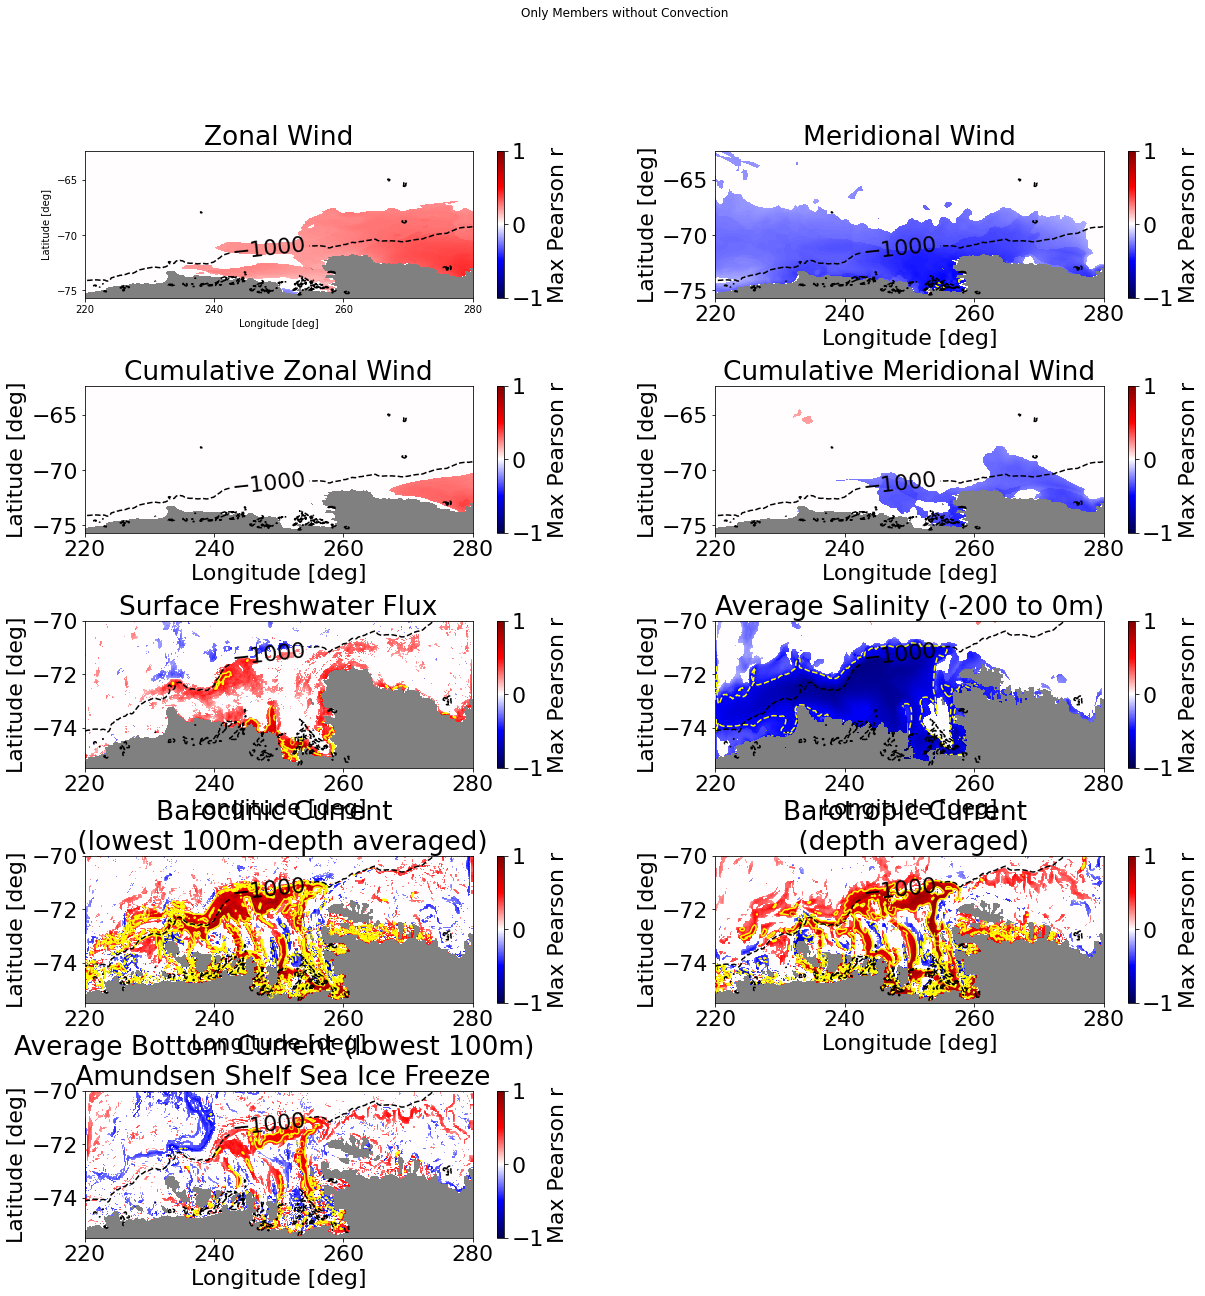

In [3]:
plt.figure(figsize=(20,20))
members=np.array([5,8,9,10, 14,19,20])
plt.suptitle('Only Members without Convection')
#members=np.array([1,2,15])
#members=np.arange(1,21)
#members='all'

window=60
ax=plt.subplot(5,2,1)
showCorMapAxis(ax=ax, members=members, data=None, datafn='EXFuwind', datavar='EXFuwind', datakind='maps',
                  ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 0),
                  detrend=True, window=window, 
                  title='Zonal Wind', 
                  ymax=None, save=True, savefn='EXFvwind_dotson_to_cosgrove_'+str(window)+'month_dt',
                  draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
                  inverse=False,
                  give_back=False, deseasonalize=True, cumsum_map=False)

ax=plt.subplot(5,2,2)
showCorMapAxis(ax=ax, members=members, data=None, datafn='EXFvwind', datavar='EXFvwind', datakind='maps',
                  ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 0),
                  detrend=True, window=window, 
                  title='Meridional Wind', 
                  ymax=None, save=True, savefn='EXFvwind_dotson_to_cosgrove_'+str(window)+'month_dt',
                  draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
                  inverse=False,
                  give_back=False, deseasonalize=True, cumsum_map=False)


ax=plt.subplot(5,2,3)
showCorMapAxis(ax=ax, members=members, data=None, datafn='EXFuwind', datavar='EXFuwind', datakind='maps',
                  ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 0),
                  detrend=True, window=window, 
                  title='Cumulative Zonal Wind', 
                  ymax=None, save=True, savefn='EXFvwind_dotson_to_cosgrove_'+str(window)+'month_dt',
                  draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
                  inverse=False,
                  give_back=False, deseasonalize=True, cumsum_map=True)

ax=plt.subplot(5,2,4)
showCorMapAxis(ax=ax, members=members, data=None, datafn='EXFvwind', datavar='EXFvwind', datakind='maps',
                  ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 0),
                  detrend=True, window=window, 
                  title='Cumulative Meridional Wind', 
                  ymax=None, save=True, savefn='EXFvwind_dotson_to_cosgrove_'+str(window)+'month_dt',
                  draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
                  inverse=False,
                  give_back=False, deseasonalize=True, cumsum_map=True)


ax=plt.subplot(5,2,5)
showCorMapAxis(ax=ax, members=members, data=None, datafn='oceFWflx', datavar='oceFWflx', datakind='maps',
              ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 12),
              detrend=True, window=window, title='Surface Freshwater Flux', ymax=-70, save=True, savefn='oceFWflx_dotson_to_cosgrove_'+str(window)+'month_dt',
              draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
              inverse=False,
              give_back=False, deseasonalize=True, cumsum_map=False)

ax=plt.subplot(5,2,6)
showCorMapAxis(ax=ax, members=members, data=None, datafn='SALT_averaged_-200to0', datavar='SALT', datakind='maps',
                  ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 24),
                  detrend=True, window=window, title='Average Salinity (-200 to 0m)', ymax=-70, save=True, 
                  savefn='SALT-200to0_dotson_to_cosgrove_'+str(window)+'month_dt',
                  draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
                  inverse=False,
                  give_back=False, deseasonalize=True, cumsum_map=False)


ax=plt.subplot(5,2,7)
showCorMapAxis(ax=ax, members=members, datafn='baroclinic_UVEL', datavar='UVEL', datakind='old',
                      ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 24),
                      detrend=True, window=window, title='Baroclinic Current \n (lowest 100m-depth averaged)', ymax=-70, save=True, 
                      savefn='baroclinic_VEL_dotson_to_cosgrove_'+str(window)+'month_dt',
                      draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],deseasonalize=False,
                      inverse=False,
                      give_back=False)

ax=plt.subplot(5,2,8)
showCorMapAxis(ax=ax, members=members, datafn='depth_averaged_UVEL', datavar='UVEL', datakind='old',
                      ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 24),
                      detrend=True, window=window, title='Barotropic Current \n (depth averaged)', ymax=-70, save=True, 
                      savefn='baroclinic_VEL_dotson_to_cosgrove_'+str(window)+'month_dt',
                      draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],deseasonalize=False,
                      inverse=False,
                      give_back=False)

ax=plt.subplot(5,2,9)
showCorMapAxis(ax=ax, members=members,
              data=None, datafn='bottom100m_averaged_UVEL', datavar='UVEL', datakind='old',
              ind=None, indfn='timeseries_forcing', indvar='amundsen_shelf_seaice_freeze', lags=range(-24, 24),
              detrend=True, window=window, title='Average Bottom Current (lowest 100m) \n Amundsen Shelf Sea Ice Freeze', ymax=-70, save=True, savefn='bottom100m_VEL_amundsen_seaice_freeze_'+str(window)+'month_dt',
              draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
              inverse=False,
              give_back=False, deseasonalize=True)


plt.subplots_adjust(hspace=0.6, wspace=0.3)


Start preparing for correlation map!
NOTE: this is version 3!


/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':


...Plotting
Start preparing for correlation map!
NOTE: this is version 3!


/tmp/ipykernel_88110/268045402.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if members=='all':


...Plotting


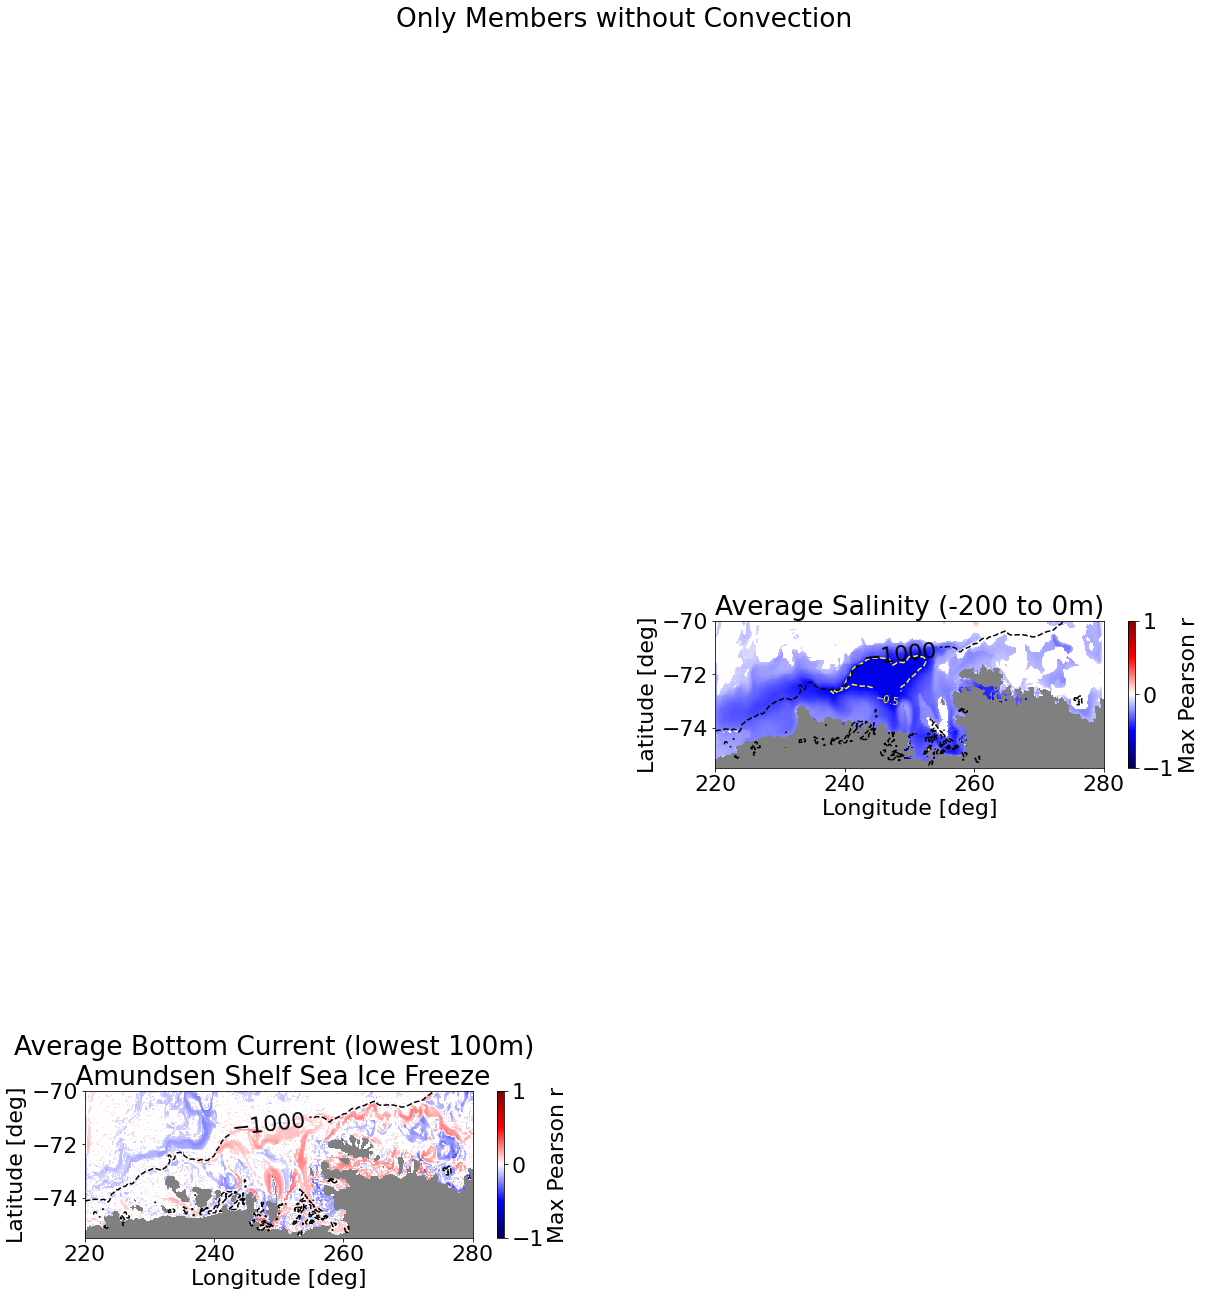

In [4]:
plt.figure(figsize=(20,20))
members=np.array([5,8,9,10, 14,19,20])
plt.suptitle('Only Members without Convection')
#members=np.array([1,2,15])
#members=np.arange(1,21)
#members='all'

window=60
# ax=plt.subplot(5,2,1)
# showCorMapAxis(ax=ax, members=members, data=None, datafn='EXFuwind', datavar='EXFuwind', datakind='maps',
#                   ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 0),
#                   detrend=True, window=window, 
#                   title='Zonal Wind', 
#                   ymax=None, save=True, savefn='EXFvwind_dotson_to_cosgrove_'+str(window)+'month_dt',
#                   draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
#                   inverse=False,
#                   give_back=False, deseasonalize=True, cumsum_map=False)

# ax=plt.subplot(5,2,2)
# showCorMapAxis(ax=ax, members=members, data=None, datafn='EXFvwind', datavar='EXFvwind', datakind='maps',
#                   ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 0),
#                   detrend=True, window=window, 
#                   title='Meridional Wind', 
#                   ymax=None, save=True, savefn='EXFvwind_dotson_to_cosgrove_'+str(window)+'month_dt',
#                   draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
#                   inverse=False,
#                   give_back=False, deseasonalize=True, cumsum_map=False)


# ax=plt.subplot(5,2,3)
# showCorMapAxis(ax=ax, members=members, data=None, datafn='EXFuwind', datavar='EXFuwind', datakind='maps',
#                   ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 0),
#                   detrend=True, window=window, 
#                   title='Cumulative Zonal Wind', 
#                   ymax=None, save=True, savefn='EXFvwind_dotson_to_cosgrove_'+str(window)+'month_dt',
#                   draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
#                   inverse=False,
#                   give_back=False, deseasonalize=True, cumsum_map=True)

# ax=plt.subplot(5,2,4)
# showCorMapAxis(ax=ax, members=members, data=None, datafn='EXFvwind', datavar='EXFvwind', datakind='maps',
#                   ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 0),
#                   detrend=True, window=window, 
#                   title='Cumulative Meridional Wind', 
#                   ymax=None, save=True, savefn='EXFvwind_dotson_to_cosgrove_'+str(window)+'month_dt',
#                   draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
#                   inverse=False,
#                   give_back=False, deseasonalize=True, cumsum_map=True)


# ax=plt.subplot(5,2,5)
# showCorMapAxis(ax=ax, members=members, data=None, datafn='oceFWflx', datavar='oceFWflx', datakind='maps',
#               ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 12),
#               detrend=True, window=window, title='Surface Freshwater Flux', ymax=-70, save=True, savefn='oceFWflx_dotson_to_cosgrove_'+str(window)+'month_dt',
#               draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
#               inverse=False,
#               give_back=False, deseasonalize=True, cumsum_map=False)

window=1
ax=plt.subplot(5,2,6)
showCorMapAxis(ax=ax, members=members, data=None, datafn='SALT_averaged_-200to0', datavar='SALT', datakind='maps',
                  ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 24),
                  detrend=True, window=window, title='Average Salinity (-200 to 0m)', ymax=-70, save=True, 
                  savefn='SALT-200to0_dotson_to_cosgrove_'+str(window)+'month_dt',
                  draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
                  inverse=False,
                  give_back=False, deseasonalize=True, cumsum_map=False)


# ax=plt.subplot(5,2,7)
# showCorMapAxis(ax=ax, members=members, datafn='baroclinic_UVEL', datavar='UVEL', datakind='old',
#                       ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 24),
#                       detrend=True, window=window, title='Baroclinic Current \n (lowest 100m-depth averaged)', ymax=-70, save=True, 
#                       savefn='baroclinic_VEL_dotson_to_cosgrove_'+str(window)+'month_dt',
#                       draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],deseasonalize=False,
#                       inverse=False,
#                       give_back=False)

# ax=plt.subplot(5,2,8)
# showCorMapAxis(ax=ax, members=members, datafn='depth_averaged_UVEL', datavar='UVEL', datakind='old',
#                       ind=None, indfn='timeseries_final', indvar='dotson_to_cosgrove_massloss', lags=range(-24, 24),
#                       detrend=True, window=window, title='Barotropic Current \n (depth averaged)', ymax=-70, save=True, 
#                       savefn='baroclinic_VEL_dotson_to_cosgrove_'+str(window)+'month_dt',
#                       draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],deseasonalize=False,
#                       inverse=False,
#                       give_back=False)
window=1
ax=plt.subplot(5,2,9)
showCorMapAxis(ax=ax, members=members,
              data=None, datafn='bottom100m_averaged_UVEL', datavar='UVEL', datakind='old',
              ind=None, indfn='timeseries_forcing', indvar='amundsen_shelf_seaice_freeze', lags=range(-24, 24),
              detrend=True, window=window, title='Average Bottom Current (lowest 100m) \n Amundsen Shelf Sea Ice Freeze', ymax=-70, save=True, savefn='bottom100m_VEL_amundsen_seaice_freeze_'+str(window)+'month_dt',
              draw_box=False, box_x=[360-115, 360-102],box_y=[-71.8, -70.2],
              inverse=False,
              give_back=False, deseasonalize=True)


plt.subplots_adjust(hspace=0.6, wspace=0.3)


In [109]:
res=xr.corr(dataU['UVEL'].sel(ens=0, time=slice('1920', '2013'))
            -dataU['UVEL'].sel(ens=0, time=slice('1920', '2013')).rolling(time=25*12, center=True).mean(),
            dataU1['UVEL'].sel(ens=0, time=slice('1920', '2013')).rolling(time=25*12, center=True).mean()
            -dataU1['UVEL'].sel(ens=0, time=slice('1920', '2013'))
            ,dim='time')

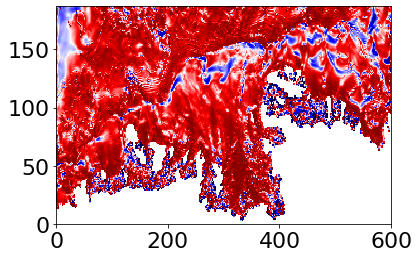

In [110]:
#Detrended
plt.pcolor(res.sel(YC=slice(-75.5, -70)), vmin=-1, vmax=1, cmap='seismic')

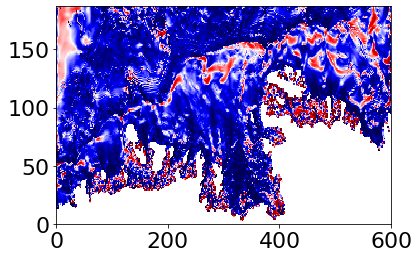

In [106]:
#Not Detrended
plt.pcolor(res.sel(YC=slice(-75.5, -70)), vmin=-1, vmax=1, cmap='seismic')

In [111]:
res=xr.corr(dataU['UVEL'].sel(ens=0, time=slice('1920', '2013')).rolling(time=60, center=True).mean()
            -dataU['UVEL'].sel(ens=0, time=slice('1920', '2013')).rolling(time=25*12, center=True).mean(),
            dataU1['UVEL'].sel(ens=0, time=slice('1920', '2013')).rolling(time=60, center=True).mean()
            -dataU1['UVEL'].sel(ens=0, time=slice('1920', '2013')).rolling(time=25*12, center=True).mean()
            ,dim='time')

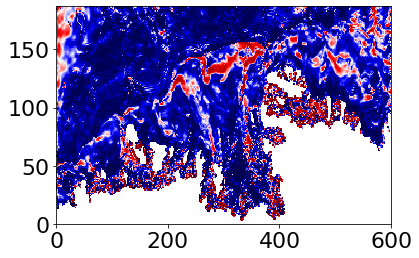

In [112]:
#Detrended
plt.pcolor(res.sel(YC=slice(-75.5, -70)), vmin=-1, vmax=1, cmap='seismic')

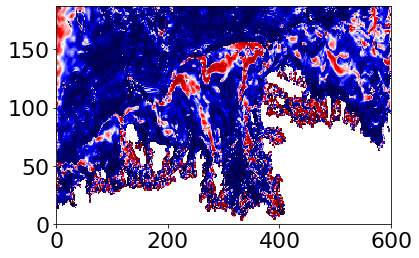

In [108]:
#Not Detrended
plt.pcolor(res.sel(YC=slice(-75.5, -70)), vmin=-1, vmax=1, cmap='seismic')

In [5]:
data=loadMITgcmData(filename='SALT_averaged_-700to-200', members=[0,3], kind='maps')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']

Loading number:0
../02_data/maps/SALT_averaged_-700to-200_ens1.nc
Loading number:1
../02_data/maps/SALT_averaged_-700to-200_ens2.nc
Loading number:2
../02_data/maps/SALT_averaged_-700to-200_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


In [7]:
meltrm=melt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

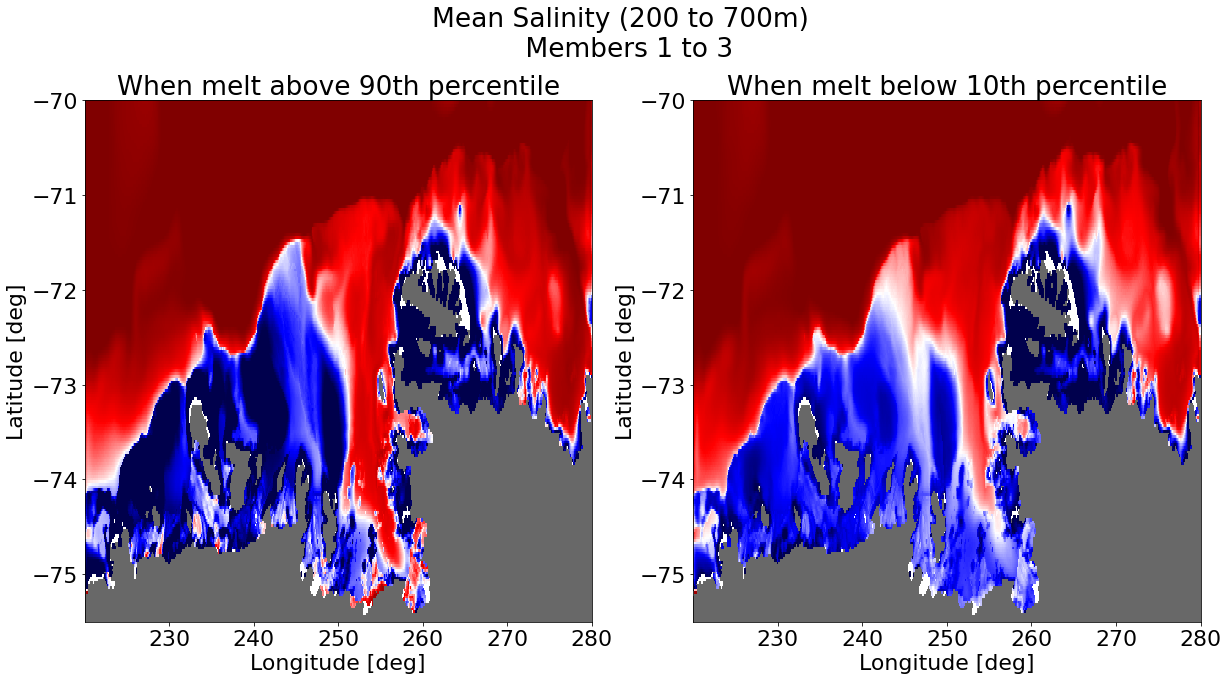

In [12]:
#step1=2
#step2=4
#scale=2

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Salinity (200 to 700m) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)

Q=plt.pcolor(Smean1.XC, Smean1.YC, Smean1['SALT'], cmap='seismic', vmin=34.3, vmax=34.7)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.XC, Smean2.YC, Smean2['SALT'], cmap='seismic', vmin=34.3, vmax=34.7)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [13]:
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='SALT')

In [14]:
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

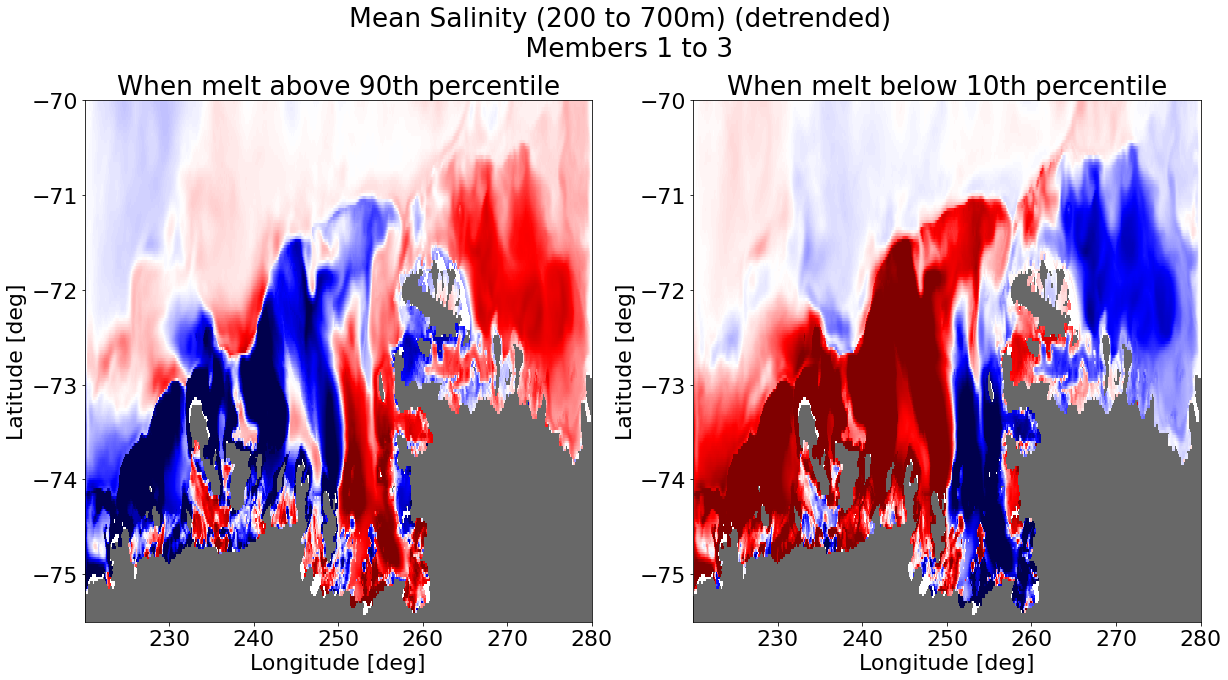

In [21]:
#step1=2
#step2=4
#scale=2

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Salinity (200 to 700m) (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.XC, Smean1.YC, Smean1, cmap='seismic', vmin=-0.030, vmax=0.030)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.XC, Smean2.YC, Smean2, cmap='seismic', vmin=-0.030, vmax=0.030)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [12]:
#High melt; low melt: is flow baroclinic?
data=loadMITgcmData(filename='UVEL_W115', members=[0,5], kind='slices')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,5], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt', window=12)
data_dt=detrend_and_average_MITgcmData(data, var='UVEL', window=12)
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Umean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Umean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/slices/UVEL_W115_ens1.nc
Loading number:1
../02_data/slices/UVEL_W115_ens2.nc
Loading number:2
../02_data/slices/UVEL_W115_ens3.nc
Loading number:3
../02_data/slices/UVEL_W115_ens4.nc
Loading number:4
../02_data/slices/UVEL_W115_ens5.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc
Loading number:3
../data/timeseries_final_PACE04.nc
Loading number:4
../data/timeseries_final_PACE05.nc


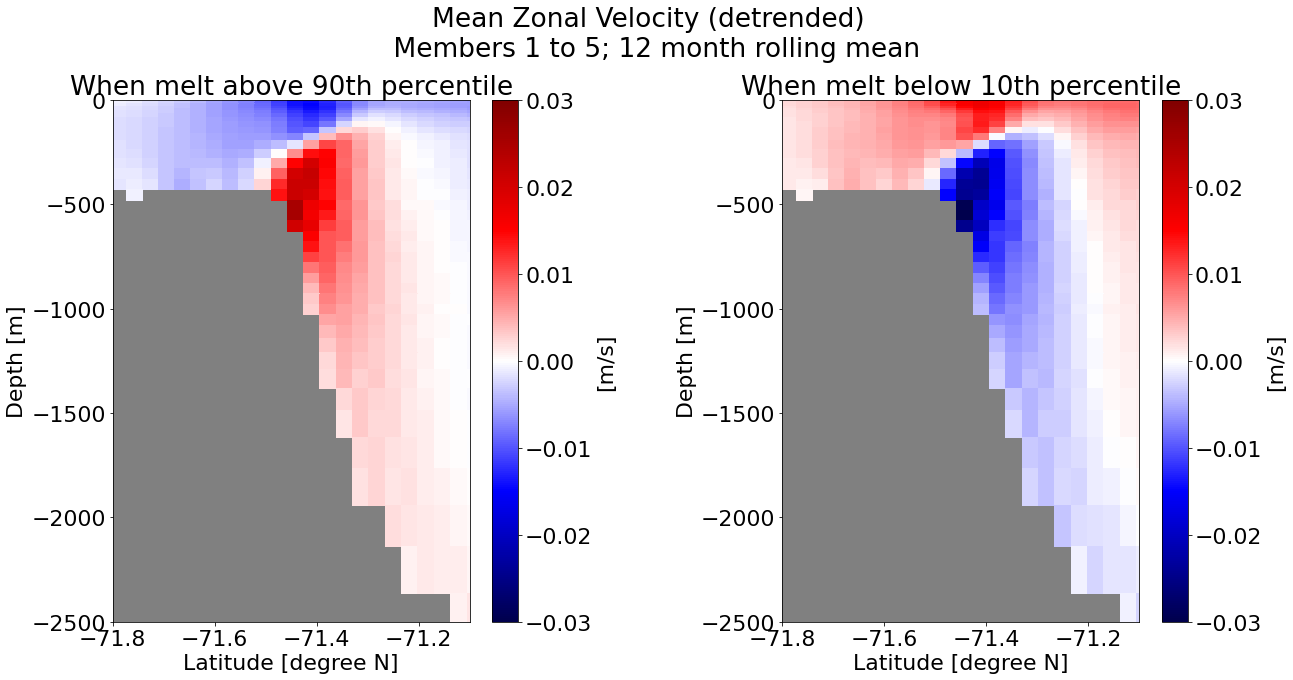

In [14]:
lon=115
Umean1=Umean1.where(Umean1!=0, drop=True)
Umean2=Umean2.where(Umean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Zonal Velocity (detrended) \n Members 1 to 5; 12 month rolling mean')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Umean1.YC, Umean1.Z, Umean1, cmap='seismic', vmin=-0.030, vmax=0.030)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.title('When melt above 90th percentile')
plt.colorbar(label='[m/s]')
#plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Umean2.YC, Umean2.Z, Umean2, cmap='seismic', vmin=-0.030, vmax=0.030)
plt.title('When melt below 10th percentile')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.colorbar(label='[m/s]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

#plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85, wspace=0.5)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [16]:
#High melt; low melt: is flow baroclinic?
data=loadMITgcmData(filename='SALT_W115', members=[0,5], kind='slices')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,5], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='SALT', window=12)
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/slices/SALT_W115_ens1.nc
Loading number:1
../02_data/slices/SALT_W115_ens2.nc
Loading number:2
../02_data/slices/SALT_W115_ens3.nc
Loading number:3
../02_data/slices/SALT_W115_ens4.nc
Loading number:4
../02_data/slices/SALT_W115_ens5.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc
Loading number:3
../data/timeseries_final_PACE04.nc
Loading number:4
../data/timeseries_final_PACE05.nc


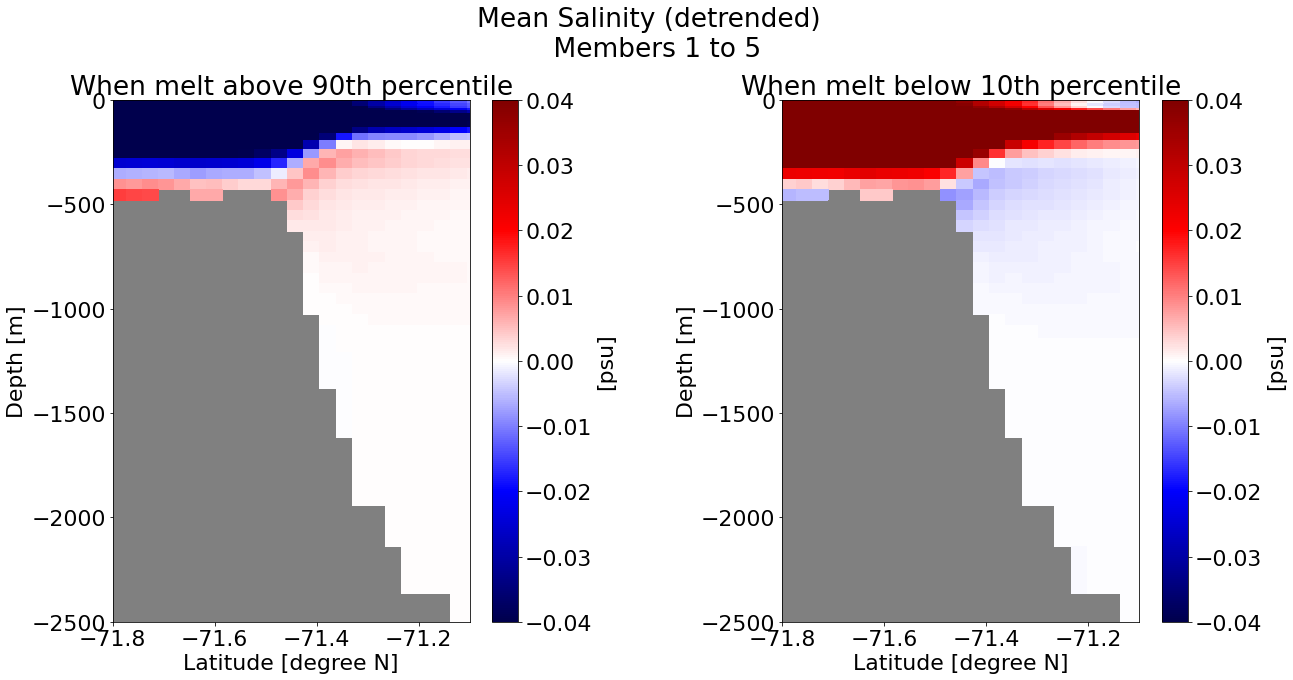

In [17]:
lon=115
Smean1=Smean1.where(Smean1!=0, drop=True)
Smean2=Smean2.where(Smean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Salinity (detrended) \n Members 1 to 5')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.YC, Smean1.Z, Smean1, cmap='seismic', vmin=-0.040, vmax=0.040)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.title('When melt above 90th percentile')
plt.colorbar(label='[psu]')
#plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.YC, Smean2.Z, Smean2, cmap='seismic', vmin=-0.040, vmax=0.040)
plt.title('When melt below 10th percentile')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.colorbar(label='[psu]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

#plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85, wspace=0.5)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [40]:
#High melt; low melt: is flow baroclinic?
data=loadMITgcmData(filename='THETA_W115', members=[0,3], kind='slices')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='THETA')
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/slices/THETA_W115_ens1.nc
Loading number:1
../02_data/slices/THETA_W115_ens2.nc
Loading number:2
../02_data/slices/THETA_W115_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


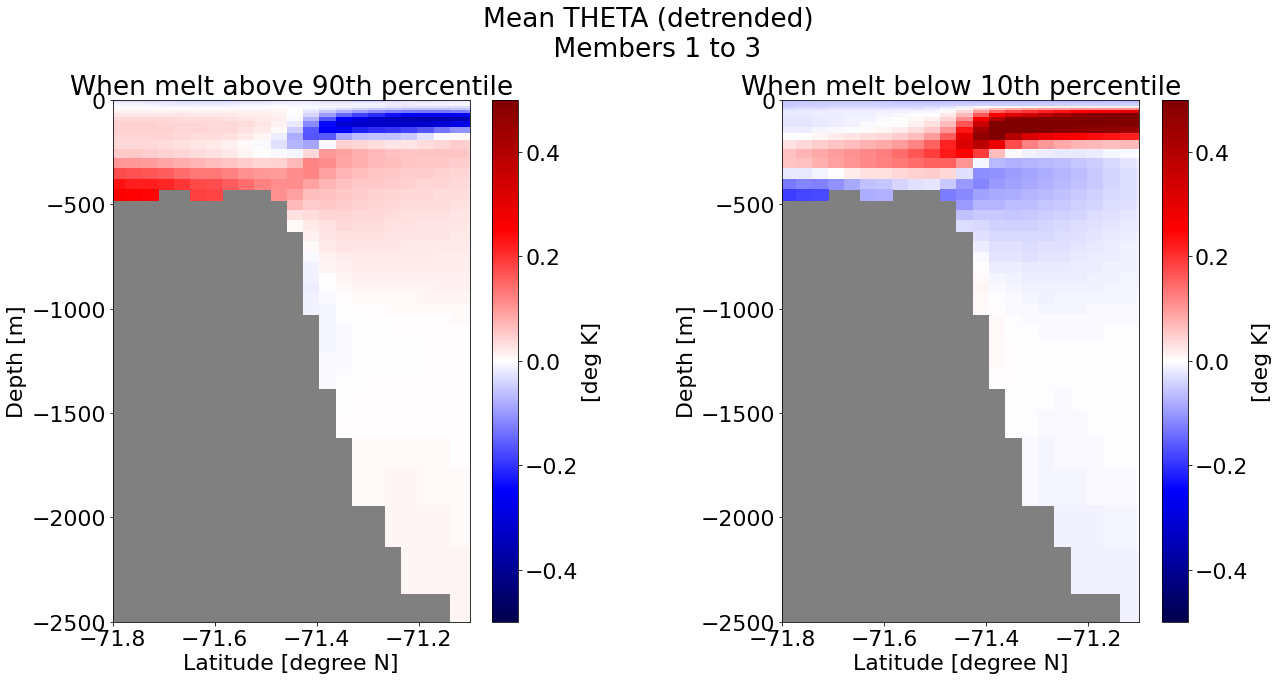

In [43]:
lon=115
Smean1=Smean1.where(Smean1!=0, drop=True)
Smean2=Smean2.where(Smean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean THETA (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.YC, Smean1.Z, Smean1, cmap='seismic', vmin=-0.5, vmax=0.5)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.title('When melt above 90th percentile')
plt.colorbar(label='[deg K]')
#plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.YC, Smean2.Z, Smean2, cmap='seismic', vmin=-0.5, vmax=0.5)
plt.title('When melt below 10th percentile')
if lon==115:
    ax.set_xlim([-71.8, -71.1])
elif lon==123:
    ax.set_xlim([-73, -72])
ax.set_ylim([-2500, 0])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degree N]')
ax.set_facecolor('grey')
plt.colorbar(label='[deg K]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

#plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85, wspace=0.5)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [44]:
#High melt; low melt: wind forcing?
data=loadMITgcmData(filename='EXFuwind', members=[0,3], kind='maps')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='EXFuwind')
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/maps/EXFuwind_ens1.nc
Loading number:1
../02_data/maps/EXFuwind_ens2.nc
Loading number:2
../02_data/maps/EXFuwind_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


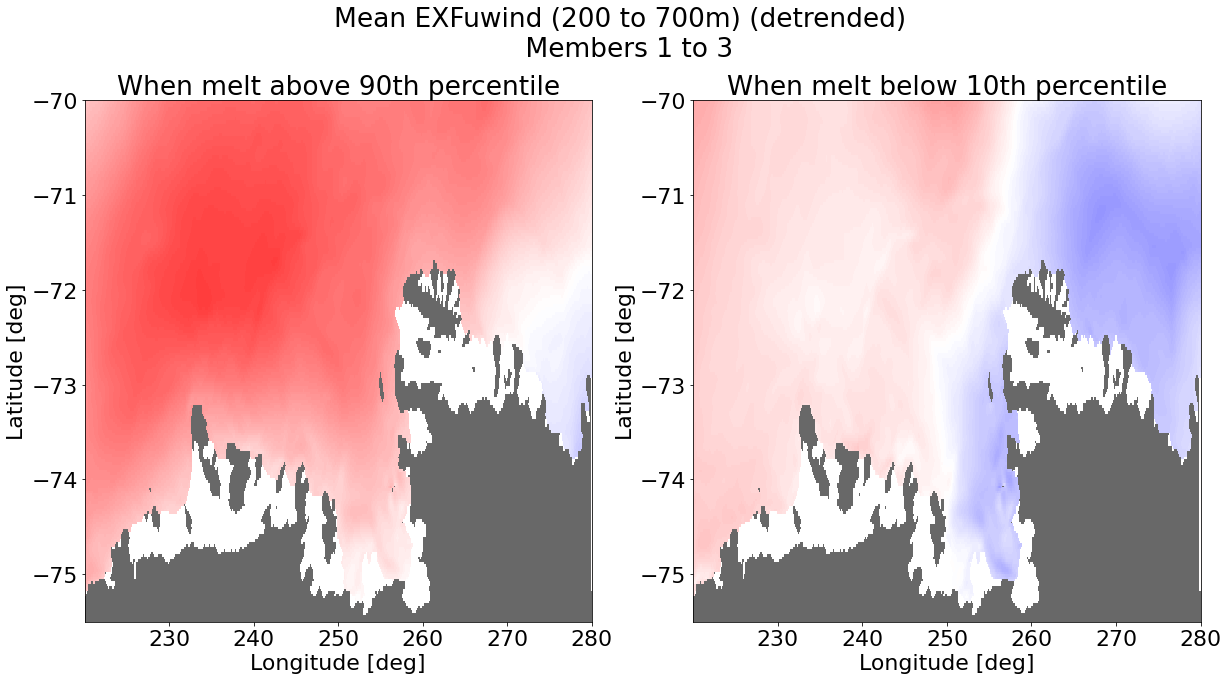

In [45]:
#step1=2
#step2=4
#scale=2

Smean1=Smean1.where(Smean1!=0, drop=True)
Smean2=Smean2.where(Smean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean EXFuwind (200 to 700m) (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.XC, Smean1.YC, Smean1, cmap='seismic', vmin=-0.5, vmax=0.5)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.XC, Smean2.YC, Smean2, cmap='seismic', vmin=-0.5, vmax=0.5)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')



In [46]:
#High melt; low melt: wind forcing?
data=loadMITgcmData(filename='EXFvwind', members=[0,3], kind='maps')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='EXFvwind')
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/maps/EXFvwind_ens1.nc
Loading number:1
../02_data/maps/EXFvwind_ens2.nc
Loading number:2
../02_data/maps/EXFvwind_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


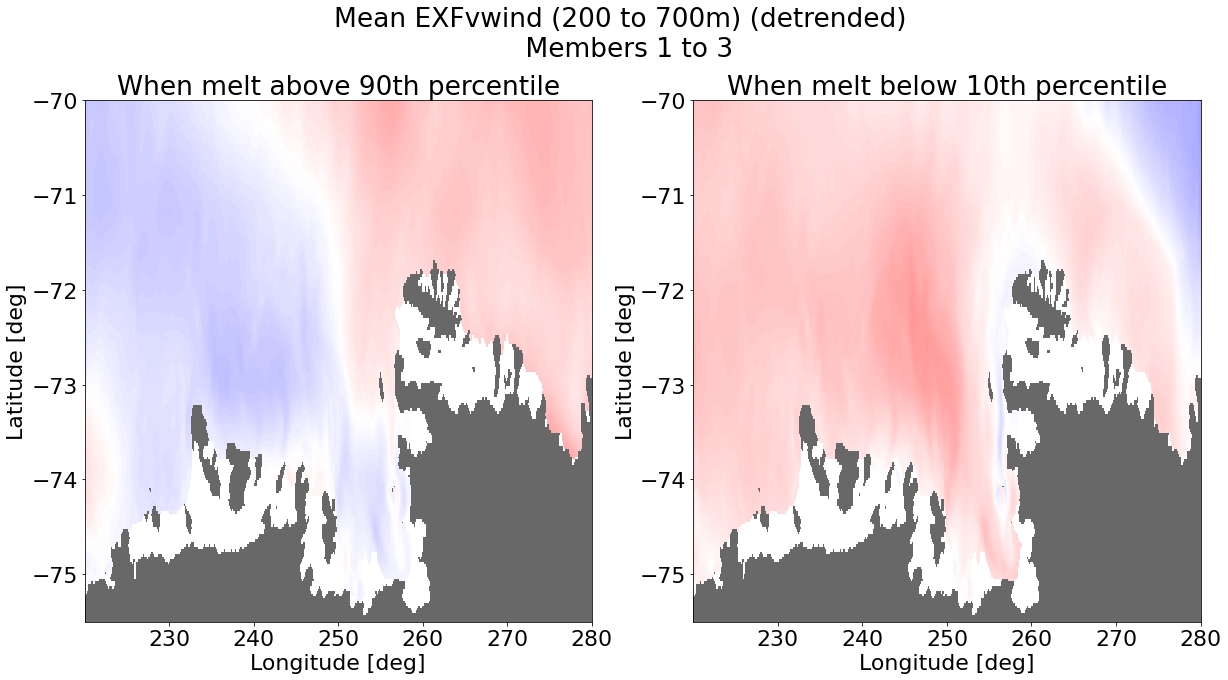

In [47]:
Smean1=Smean1.where(Smean1!=0, drop=True)
Smean2=Smean2.where(Smean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean EXFvwind (200 to 700m) (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.XC, Smean1.YC, Smean1, cmap='seismic', vmin=-0.5, vmax=0.5)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.XC, Smean2.YC, Smean2, cmap='seismic', vmin=-0.5, vmax=0.5)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')

In [55]:
#High melt; low melt: wind forcing?
data=loadMITgcmData(filename='EXFvwind', members=[0,3], kind='maps')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='EXFvwind')
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Vmean1=data_dt.cumsum(dim='time').where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Vmean2=data_dt.cumsum(dim='time').where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/maps/EXFvwind_ens1.nc
Loading number:1
../02_data/maps/EXFvwind_ens2.nc
Loading number:2
../02_data/maps/EXFvwind_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


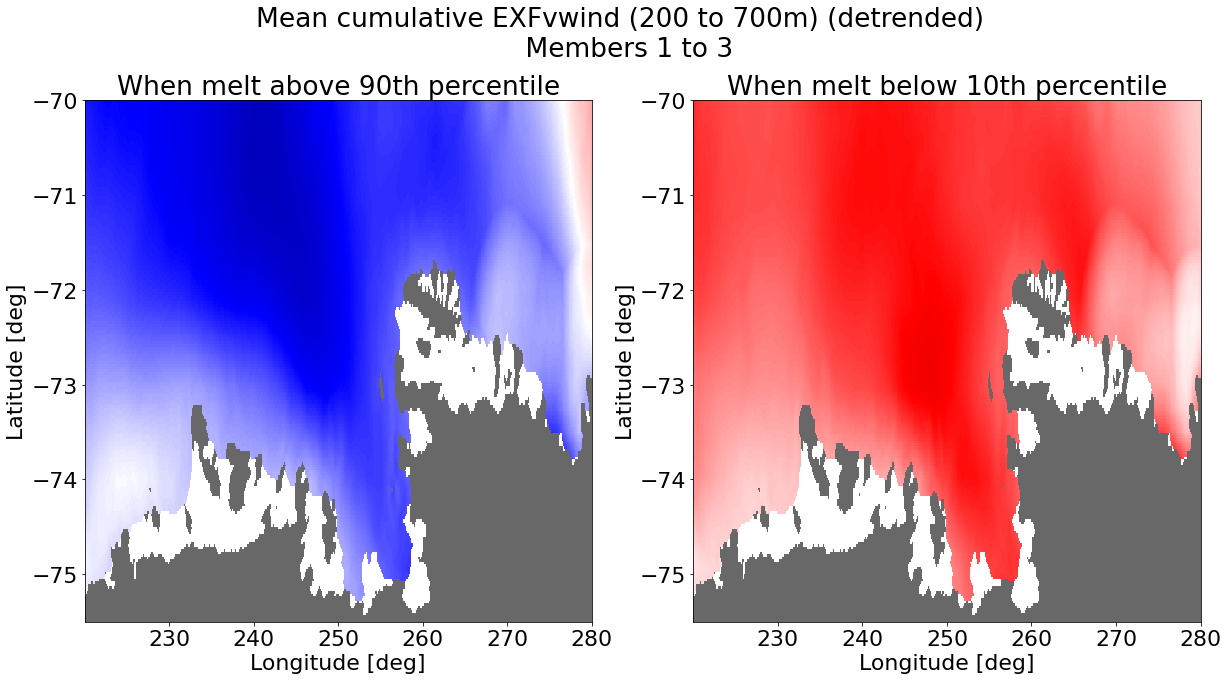

In [58]:
Vmean1=Vmean1.where(Vmean1!=0, drop=True)
Vmean2=Vmean2.where(Vmean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean cumulative EXFvwind (200 to 700m) (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Vmean1.XC, Vmean1.YC, Vmean1, cmap='seismic', vmin=-20, vmax=20)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Vmean2.XC, Vmean2.YC, Vmean2, cmap='seismic', vmin=-20, vmax=20)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')

In [50]:
#High melt; low melt: wind forcing?
data=loadMITgcmData(filename='EXFuwind', members=[0,3], kind='maps')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData, detrend_and_average_MITgcmData
melt_dt=detrend_and_average_MITgcmData(melt.to_dataset(name='melt'), var='melt')
data_dt=detrend_and_average_MITgcmData(data, var='EXFuwind')
meltrm=melt_dt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
Smean1=data_dt.cumsum(dim='time').where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
Smean2=data_dt.cumsum(dim='time').where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

Loading number:0
../02_data/maps/EXFuwind_ens1.nc
Loading number:1
../02_data/maps/EXFuwind_ens2.nc
Loading number:2
../02_data/maps/EXFuwind_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


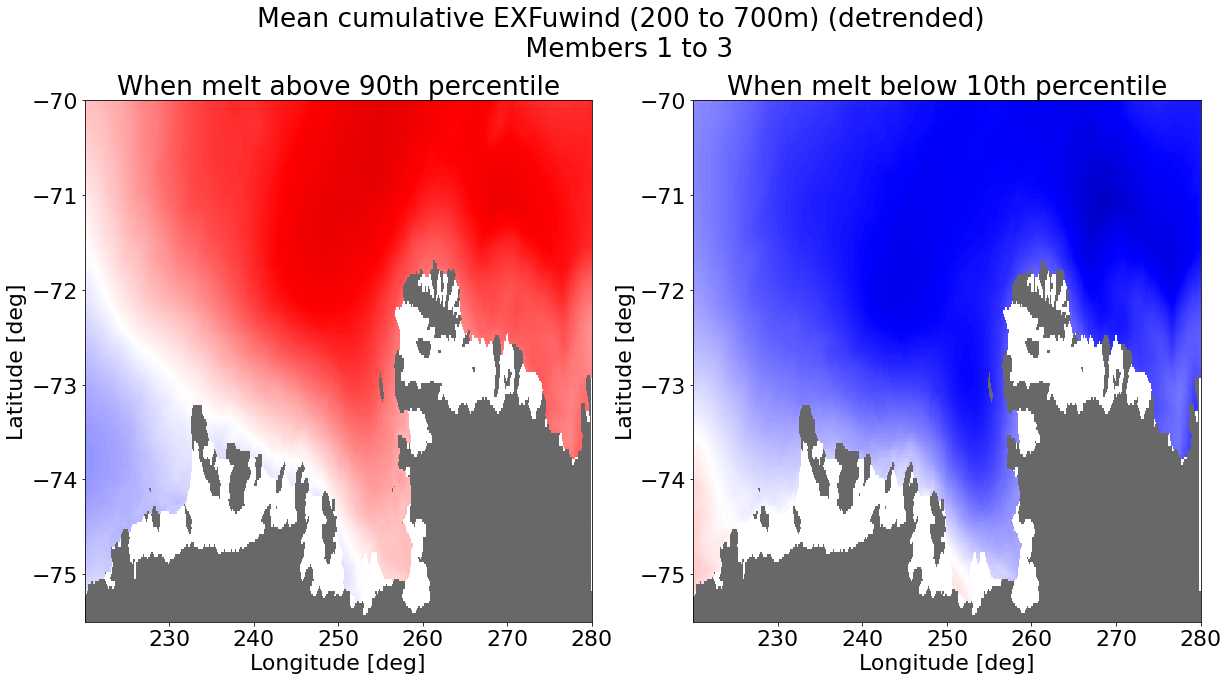

In [54]:
Smean1=Smean1.where(Smean1!=0, drop=True)
Smean2=Smean2.where(Smean2!=0, drop=True)

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean cumulative EXFuwind (200 to 700m) (detrended) \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
#plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.ice_mask[grid.lat_1d<-70,:], cmap='cool', vmax=1.5)

Q=plt.pcolor(Smean1.XC, Smean1.YC, Smean1, cmap='seismic', vmin=-20, vmax=20)
#qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.pcolor(Smean2.XC, Smean2.YC, Smean2, cmap='seismic', vmin=-20, vmax=20)
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
#plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')